import important libraries

In [381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


In [287]:
# create function to exract the column names from the given string
def custom_split(x):
        x = x.split('.')[:-1]
        lst = []
        for i in x:
                lst.append(i.split(':')[0])
        return lst
new_names = custom_split('age: continuous.workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.fnlwgt: continuous.education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.education-num: continuous.marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.sex: Female, Male.capital-gain: continuous.capital-loss: continuous.hours-per-week: continuous.native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.')
new_names.append('income')

In [288]:
new_names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [289]:
# Load the dataset
adult = pd.read_csv('adult.data.csv', names=new_names, sep=', ')
adult.shape

(32561, 15)

In [290]:
test = pd.read_csv('adult.test.csv', names=new_names, sep=', ')
test.shape

(16281, 15)

In [291]:
# clean income column on test set
test['income'] = test['income'].apply(lambda x:x.split('.')[0])

In [292]:
# merge the two datasets to apply the same preprocessing steps
con = pd.concat([adult,test])
con.reset_index(drop=True, inplace=True)

In [293]:
con.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [294]:
con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


#### no missing values in the dataset

In [295]:
# display some statistics
con.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## EDA

In [296]:
print(con['capital-gain'].head(10))
print(con['capital-loss'].head(10))

0     2174
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8    14084
9     5178
Name: capital-gain, dtype: int64
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: capital-loss, dtype: int64


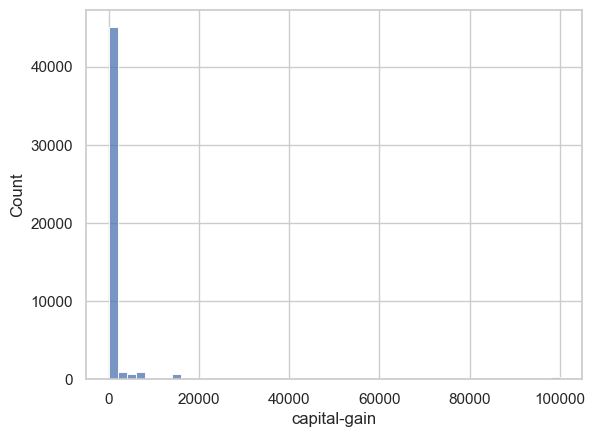

count    48842.000000
mean      1079.067626
std       7452.019058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64


In [297]:
sns.histplot(con['capital-gain'], bins=50)
plt.show()
print(con['capital-gain'].describe())

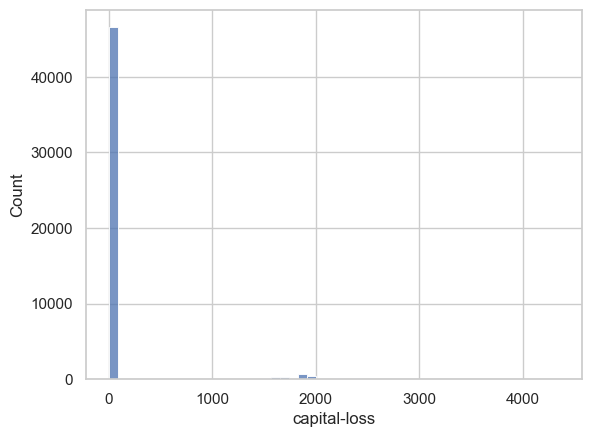

count    48842.000000
mean        87.502314
std        403.004552
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64


In [298]:
sns.histplot(con['capital-loss'], bins=50)
plt.show()
print(con['capital-loss'].describe())

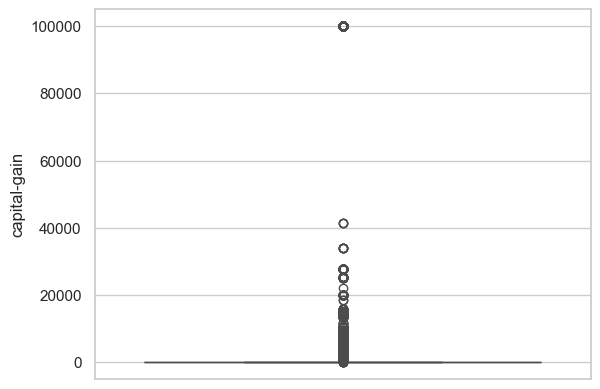

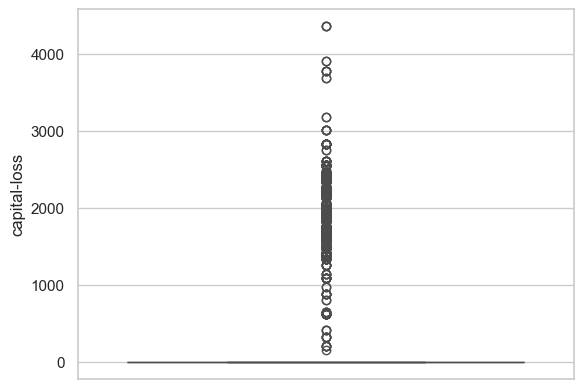

In [299]:
sns.boxplot(y='capital-gain', data=con)
plt.show()
sns.boxplot(y='capital-loss', data=con)
plt.show()

In [300]:
def outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return len(data[(data < lower_bound) | (data > upper_bound)]) / len(data) * 100
print(f'capital gain outliers percentage: {outliers(con['capital-gain']):.2f}%')
print(f'capital loss outliers percentage: {outliers(con['capital-loss']):.2f}%')

capital gain outliers percentage: 8.26%
capital loss outliers percentage: 4.67%


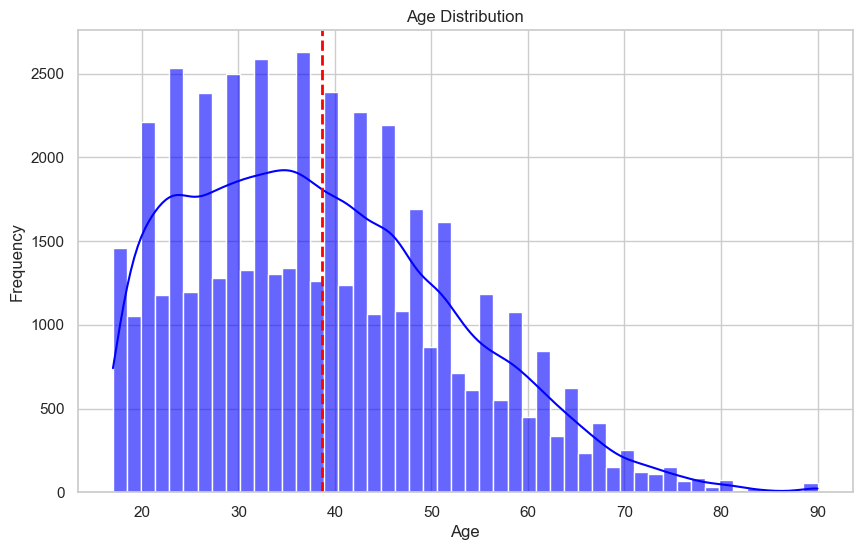

In [301]:
# display the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(con['age'], bins=50, kde=True, color='blue', alpha=0.6)
plt.axvline(con['age'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [302]:
print('Number of people above or equale 89 yeare:',con[con['age'] >= 89].shape[0])

Number of people above or equale 89 yeare: 57


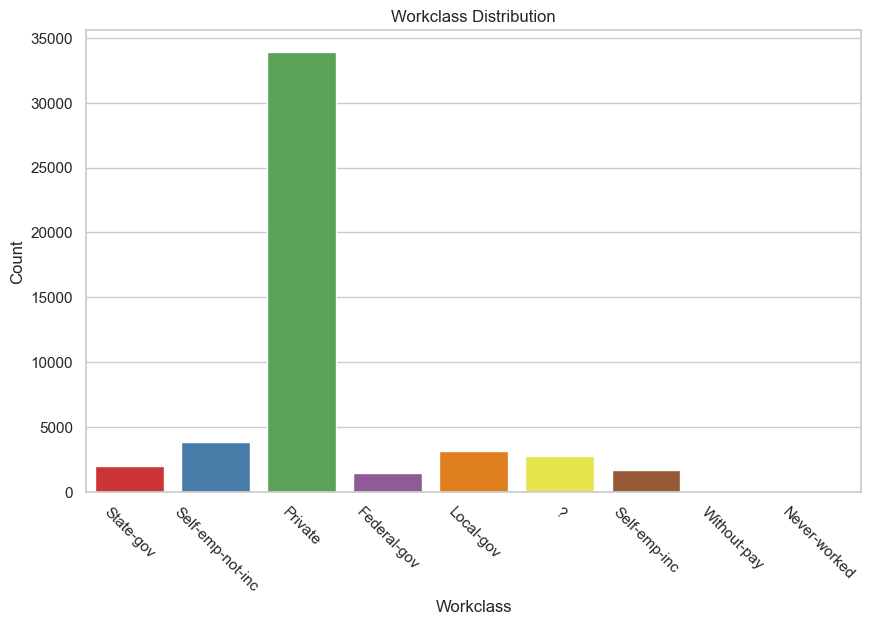

In [303]:
plt.figure(figsize=(10, 6))
sns.countplot(x='workclass', data=con, palette='Set1')
plt.xticks(rotation=-45)
plt.title('Workclass Distribution')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.show()

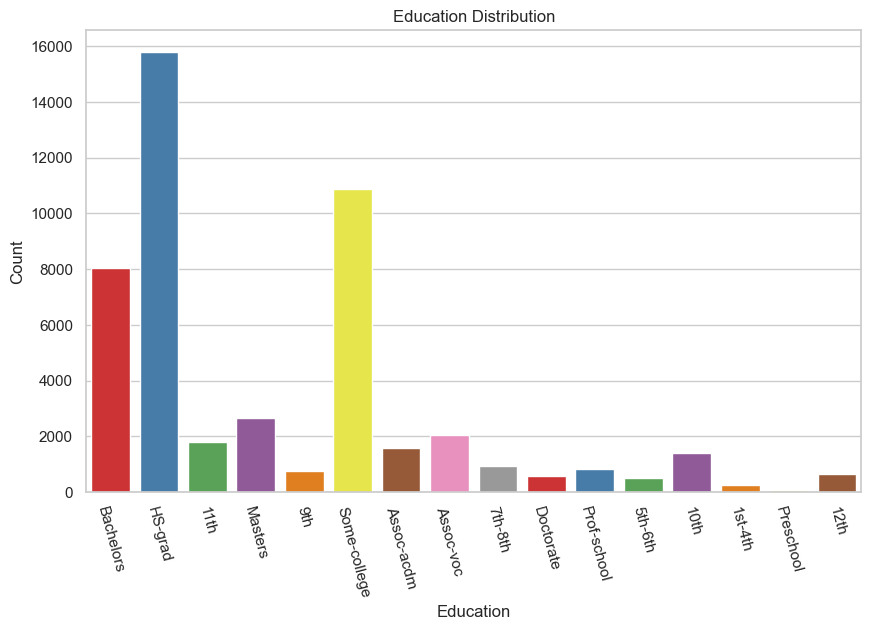

In [304]:
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=con, palette='Set1')
plt.xticks(rotation=-75)
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

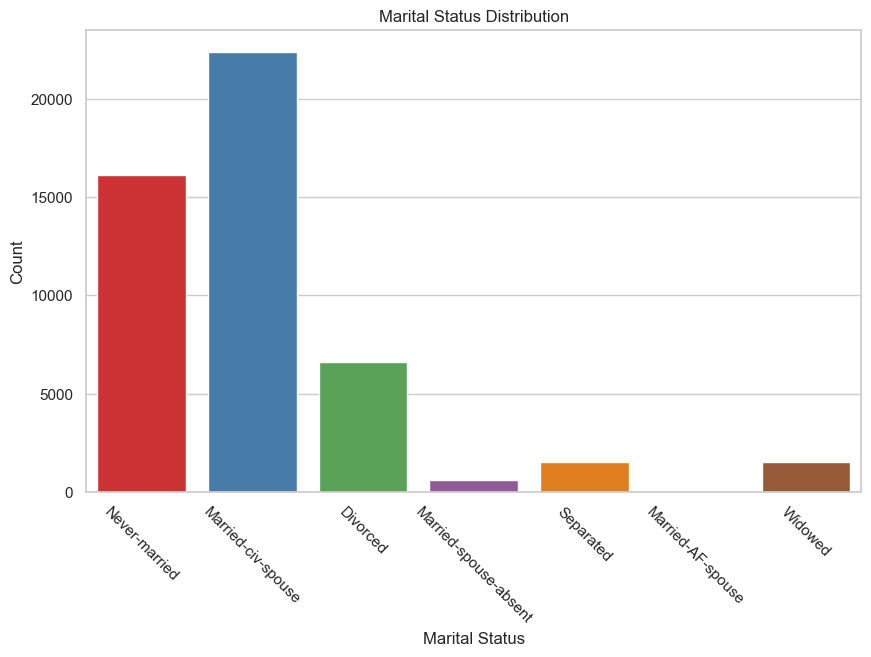

In [305]:
plt.figure(figsize=(10, 6))
sns.countplot(x='marital-status', data=con, palette='Set1')
plt.xticks(rotation=-45)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

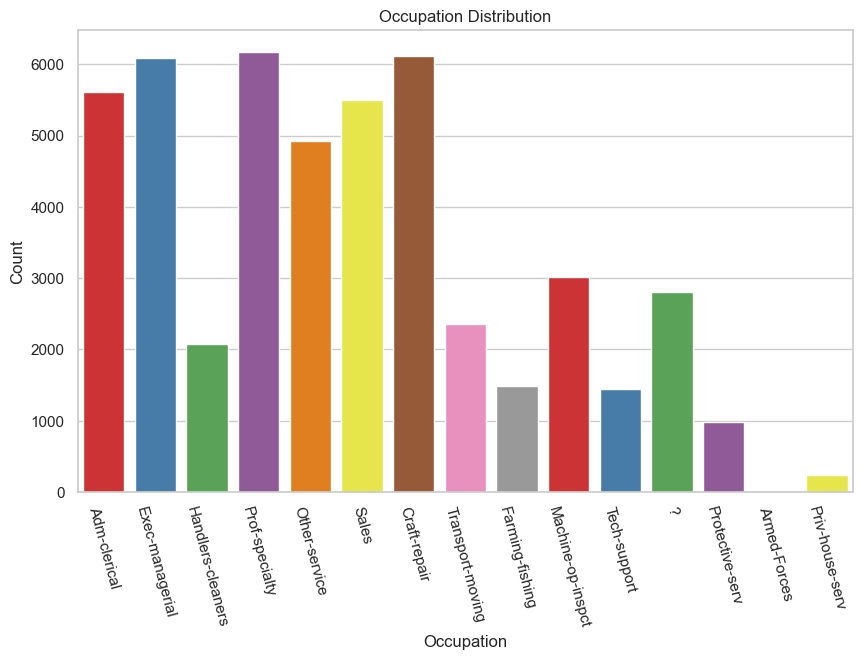

In [306]:
plt.figure(figsize=(10, 6))
sns.countplot(x='occupation', data=con, palette='Set1')
plt.xticks(rotation=-75)
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

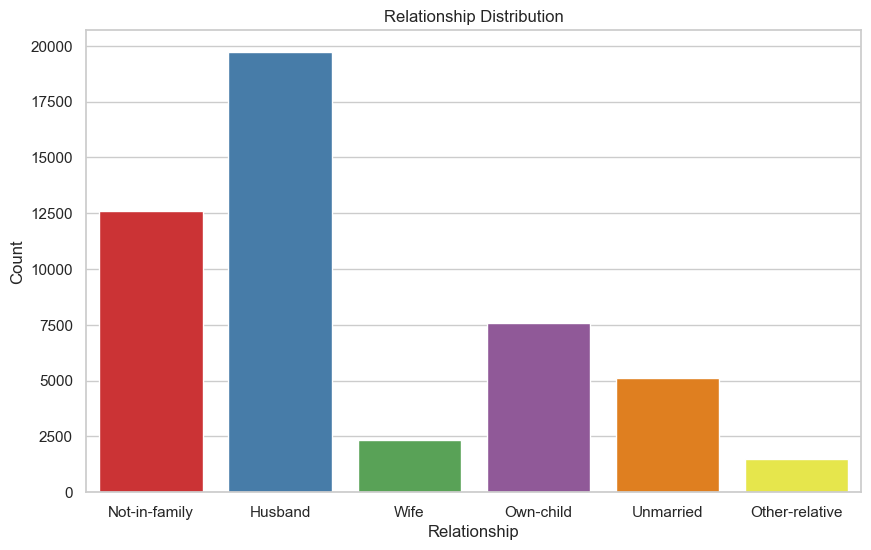

In [307]:
plt.figure(figsize=(10, 6))
sns.countplot(x='relationship', data=con, palette='Set1')
plt.title('Relationship Distribution')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.show()

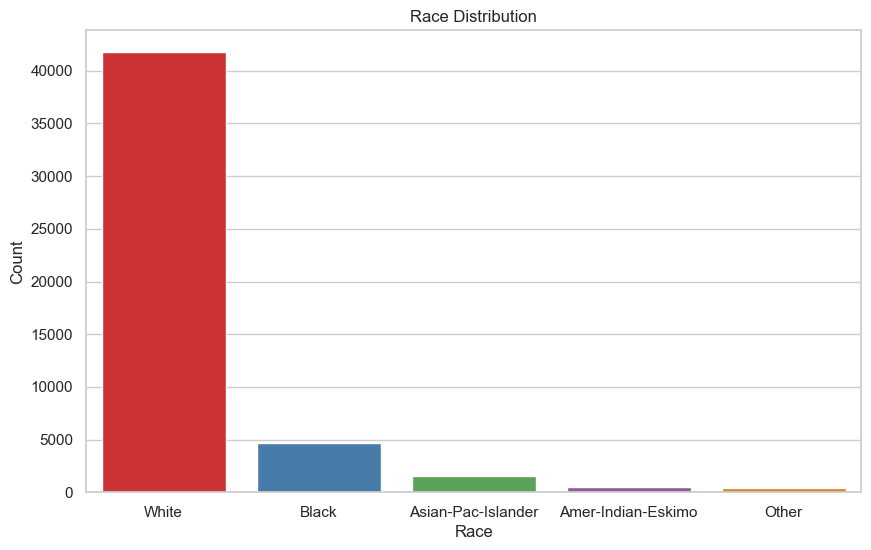

In [308]:
plt.figure(figsize=(10, 6))
sns.countplot(x='race', data=con, palette='Set1')
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

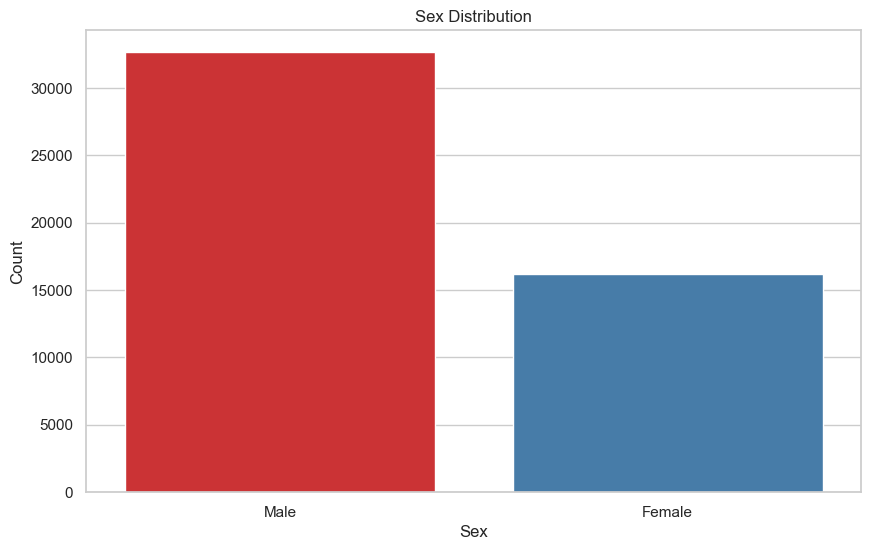

In [309]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=con, palette='Set1')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

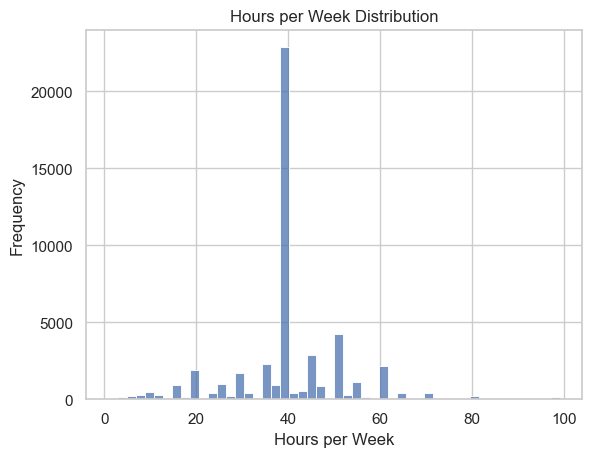

In [310]:
sns.histplot(con['hours-per-week'], bins=50)
plt.title('Hours per Week Distribution')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.show()

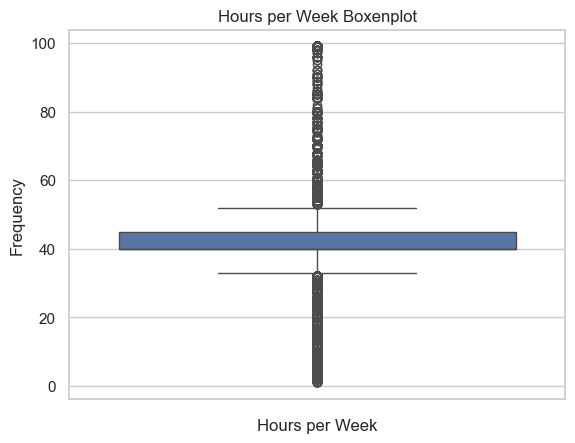

In [311]:
sns.boxplot(y='hours-per-week', data=con)
plt.title('Hours per Week Boxenplot')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.show()

In [312]:
print(f'Percentage of outliers in hours-per-week: {outliers(con["hours-per-week"]):.2f}%')

Percentage of outliers in hours-per-week: 27.63%


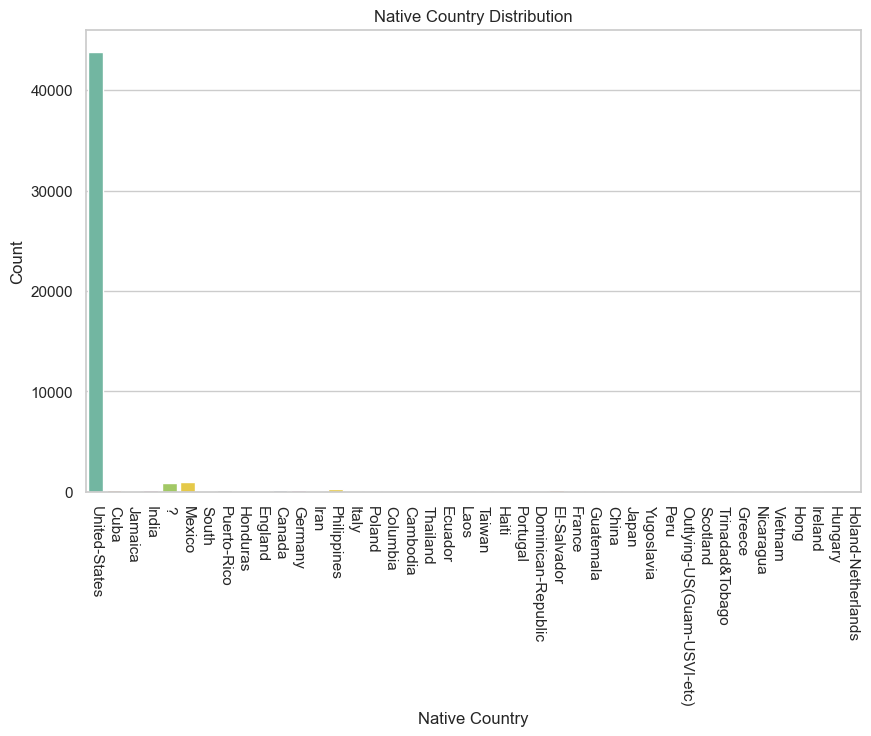

In [313]:
plt.figure(figsize=(10, 6))
sns.countplot(x='native-country', data=con, palette='Set2')
plt.xticks(rotation=-90)
plt.title('Native Country Distribution')
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.show()

In [314]:
print(con['native-country'].value_counts(normalize=True))

native-country
United-States                 0.897424
Mexico                        0.019471
?                             0.017546
Philippines                   0.006040
Germany                       0.004218
Puerto-Rico                   0.003767
Canada                        0.003726
El-Salvador                   0.003173
India                         0.003092
Cuba                          0.002825
England                       0.002600
China                         0.002498
South                         0.002355
Jamaica                       0.002170
Italy                         0.002150
Dominican-Republic            0.002109
Japan                         0.001884
Guatemala                     0.001802
Poland                        0.001781
Vietnam                       0.001761
Columbia                      0.001740
Haiti                         0.001536
Portugal                      0.001372
Taiwan                        0.001331
Iran                          0.001208
Greece    

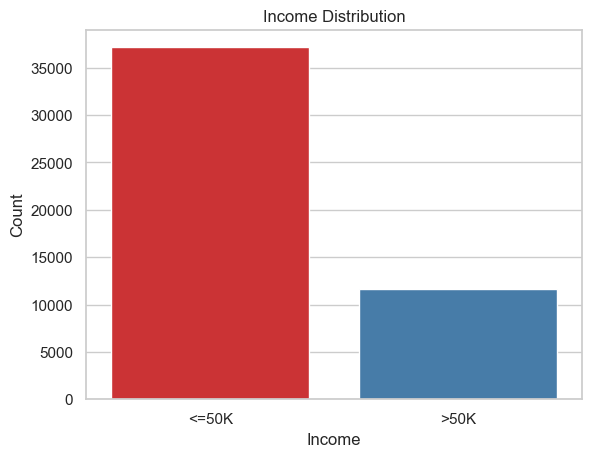

In [315]:
sns.countplot(x='income', data=con, palette='Set1')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

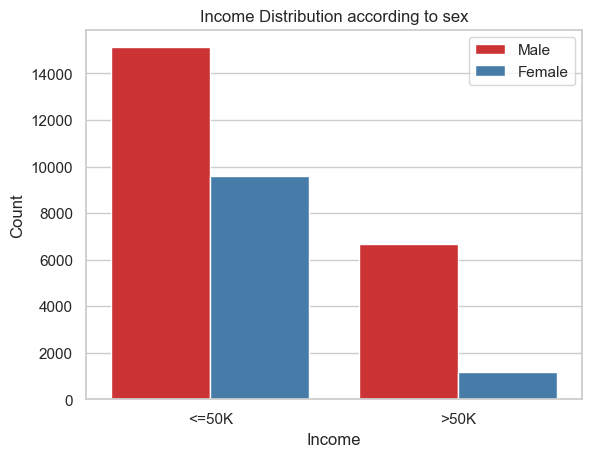

In [316]:
sns.countplot(x='income', data=con[:32561], palette='Set1', hue='sex')
plt.title('Income Distribution according to sex')
plt.xlabel('Income')
plt.ylabel('Count')
plt.legend()
plt.show()

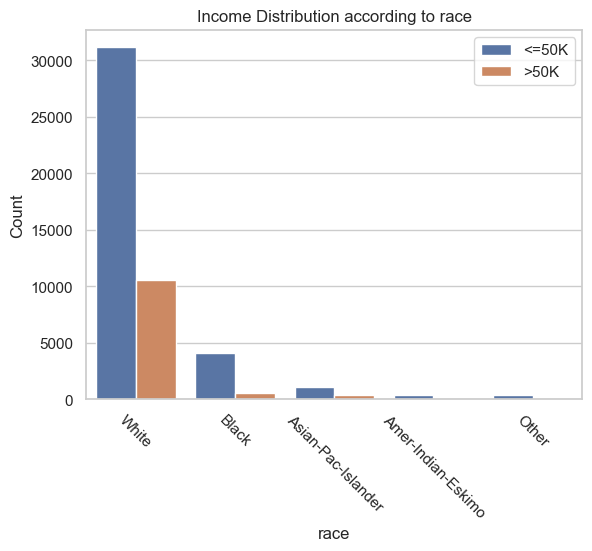

In [317]:
sns.countplot(data=con, x='race', hue='income')
plt.title('Income Distribution according to race')
plt.xlabel('race')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=-45)
plt.show()

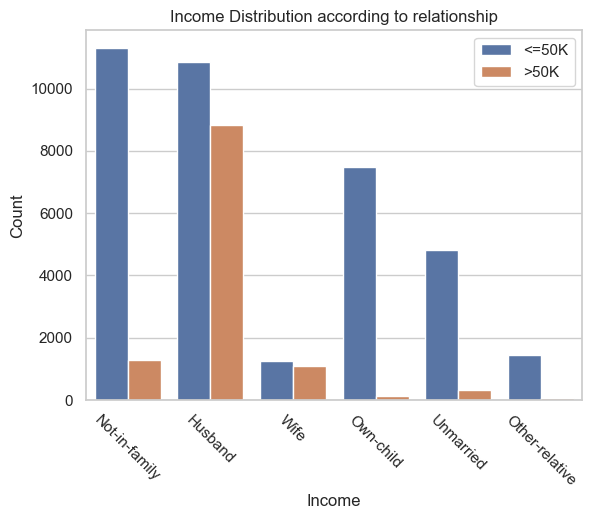

In [318]:
sns.countplot(data=con, x='relationship', hue='income')
plt.title('Income Distribution according to relationship')
plt.xlabel('Income')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=-45)
plt.show()

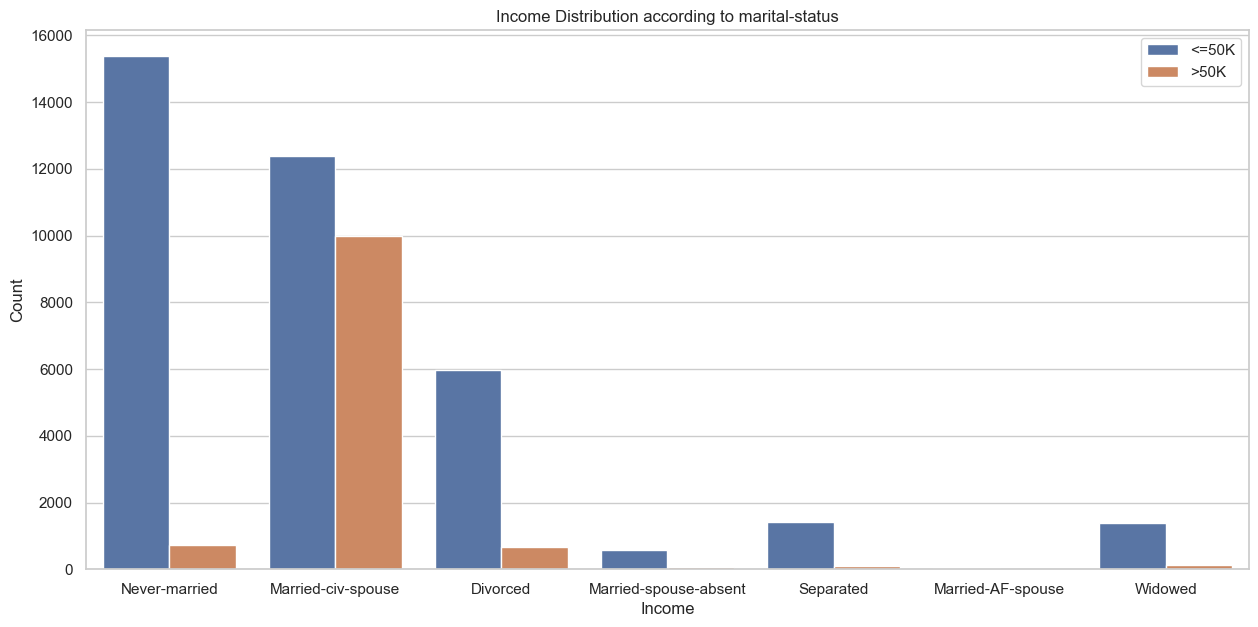

In [319]:
plt.figure(figsize=(15,7))
sns.countplot(data=con, x='marital-status', hue='income')
plt.title('Income Distribution according to marital-status')
plt.xlabel('Income')
plt.ylabel('Count')
plt.legend()
plt.show()

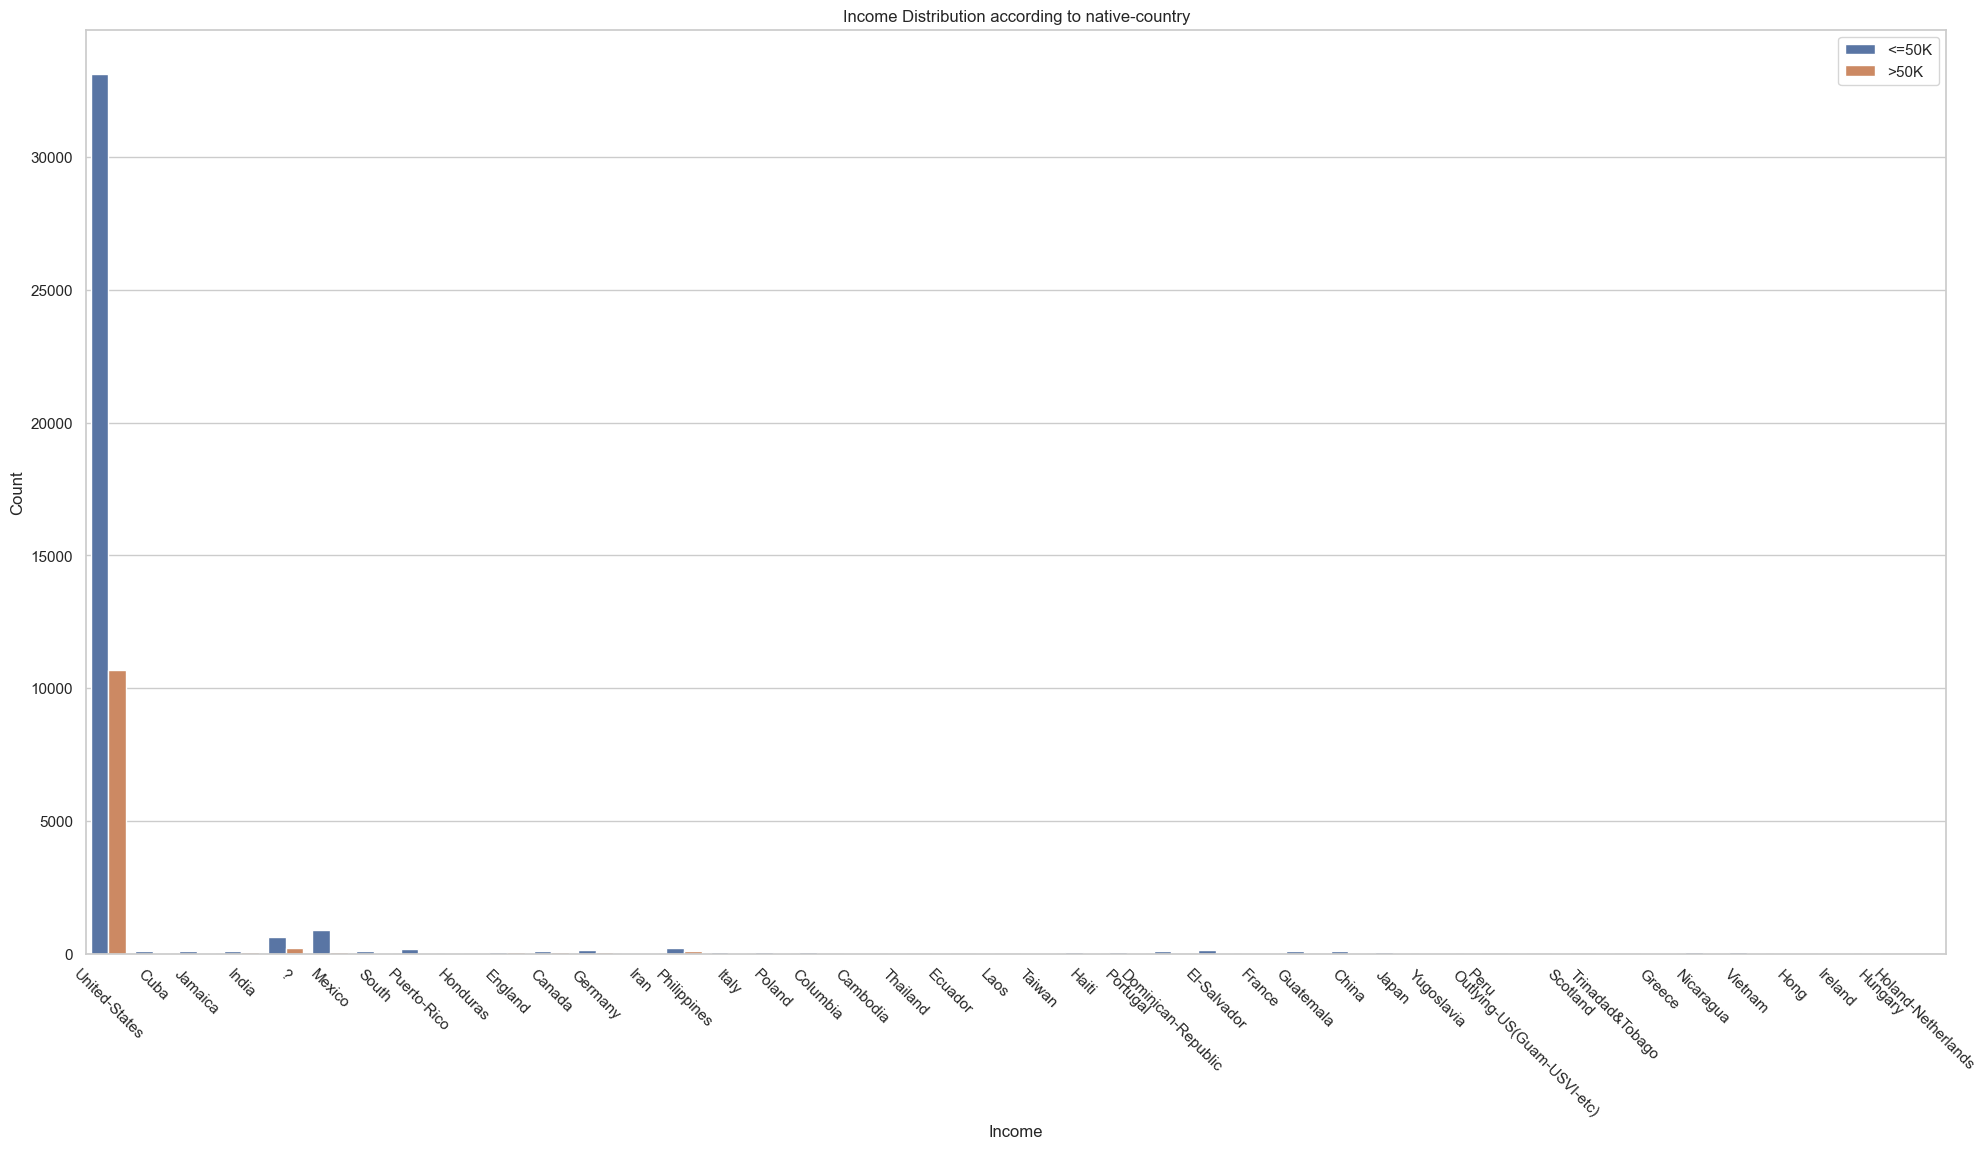

In [320]:
plt.figure(figsize=(24, 12))
sns.countplot(data=con, x='native-country', hue='income')
plt.title('Income Distribution according to native-country')
plt.xlabel('Income')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=-45)
plt.show()

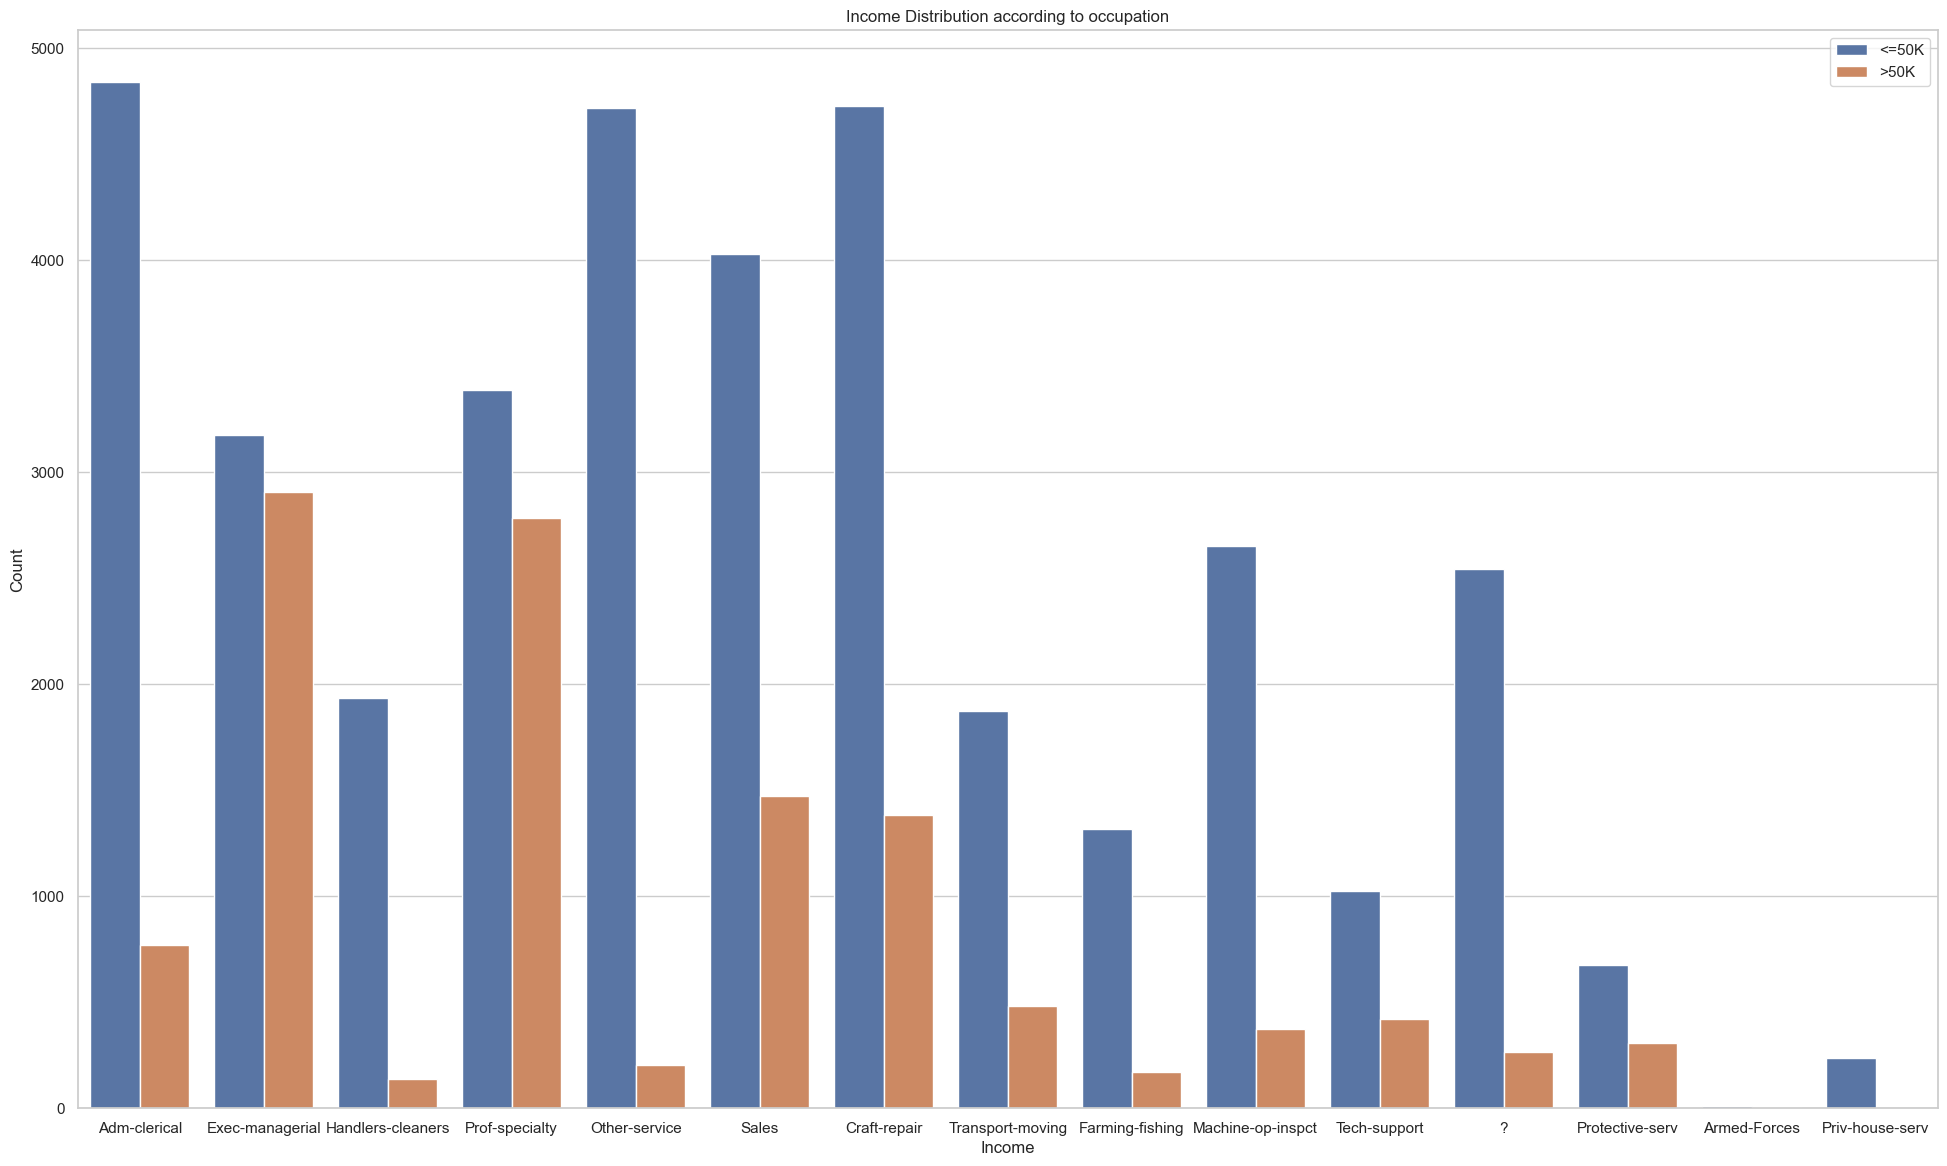

In [321]:
plt.figure(figsize=(24,14))
sns.countplot(data=con, x='occupation', hue='income')
plt.title('Income Distribution according to occupation')
plt.xlabel('Income')
plt.ylabel('Count')
plt.legend()
plt.show()

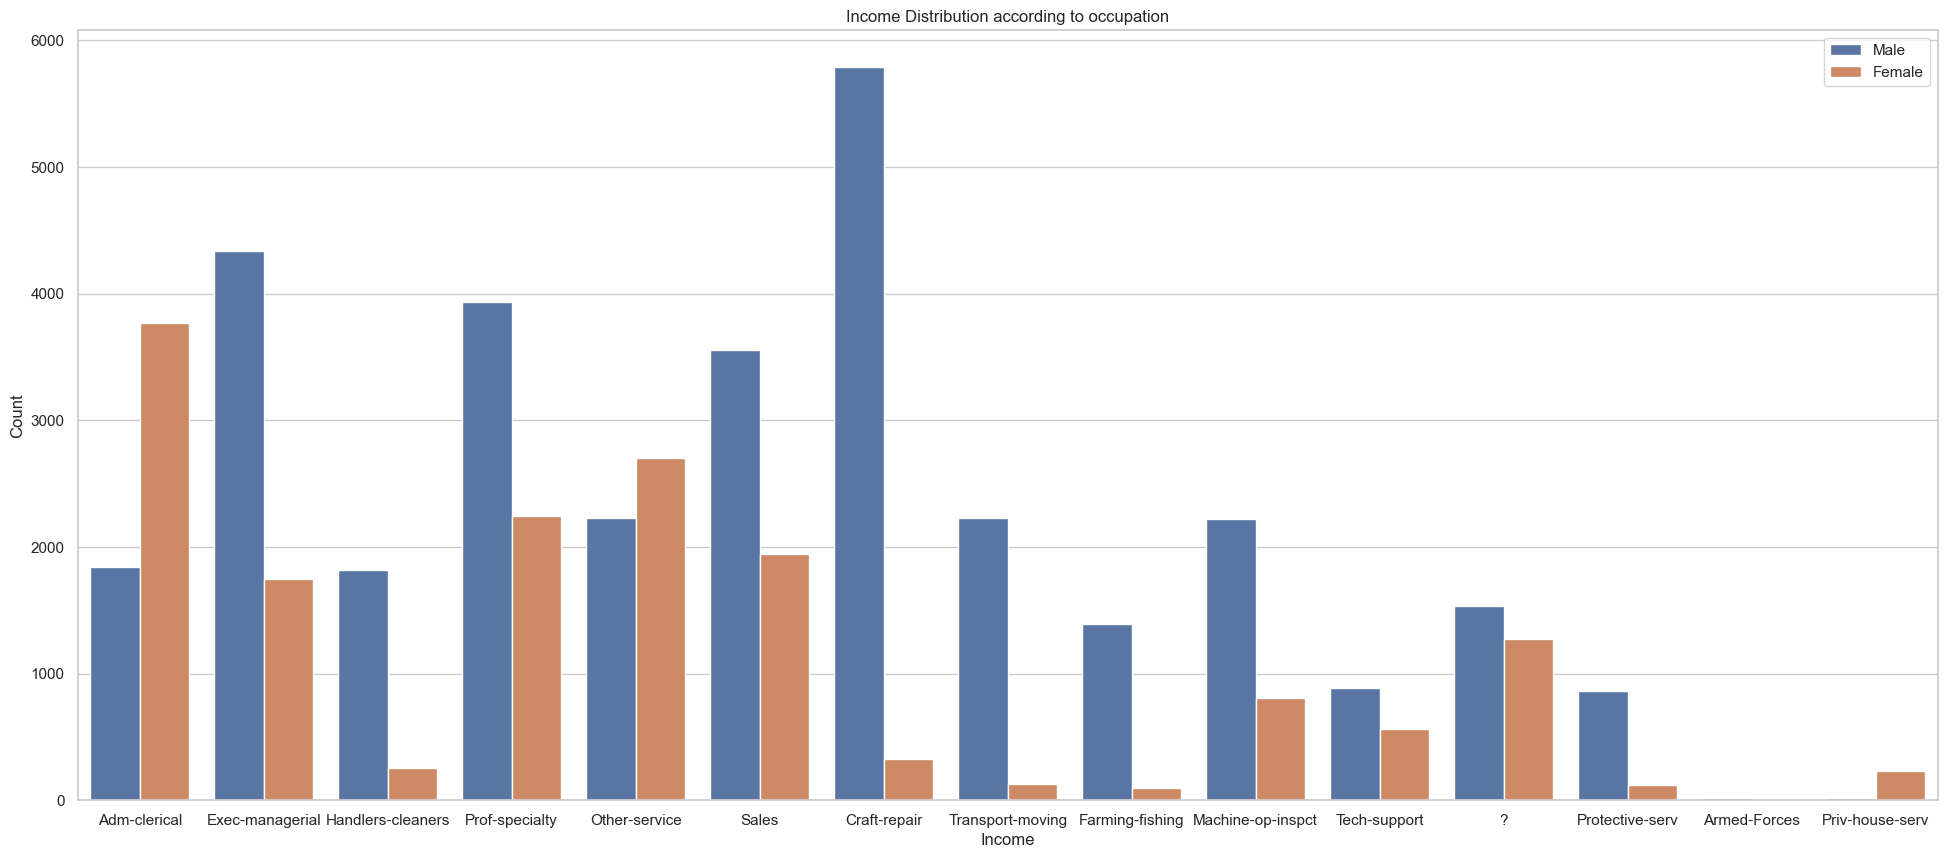

In [322]:
plt.figure(figsize=(24,10))
sns.countplot(data=con, x='occupation', hue='sex')
plt.title('Income Distribution according to occupation')
plt.xlabel('Income')
plt.ylabel('Count')
plt.legend()
plt.show()

In [323]:
# con['remainder'] = con['capital-gain'] - con['capital-loss']

In [324]:
con.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [325]:
# this is mistake i made in the previous notebook
# con.drop(['education','native-country','race','relationship','fnlwgt'], axis=1, inplace=True)

## Data cleaning and processing

In [326]:
# find columns with ? sign
def find_question_marks(data):
    question_mark_columns = []
    for column in data.columns:
        if data[column].dtype == 'object':
            if data[column].str.contains('\?').any():
                question_mark_columns.append(column)
    return question_mark_columns

In [327]:
def replace_question_marks(data):
    for column in data.columns:
        if data[column].dtype == 'object':
            data[column] = data[column].replace('?', None)
    return data
question_mark_columns = find_question_marks(con)
print("Columns with question marks:", question_mark_columns)
# replace ? with None
con = replace_question_marks(con)

Columns with question marks: ['workclass', 'occupation', 'native-country']


In [328]:
# check for null values percentage in each column
for col in con.columns:
    if con[col].isnull().sum() > 0:
        print(f"Column '{col}' has {con[col].isnull().sum()} null values, which is {con[col].isnull().sum()/con.shape[0] * 100:.2f}% of the total data.")

Column 'workclass' has 2799 null values, which is 5.73% of the total data.
Column 'occupation' has 2809 null values, which is 5.75% of the total data.
Column 'native-country' has 857 null values, which is 1.75% of the total data.


<Axes: >

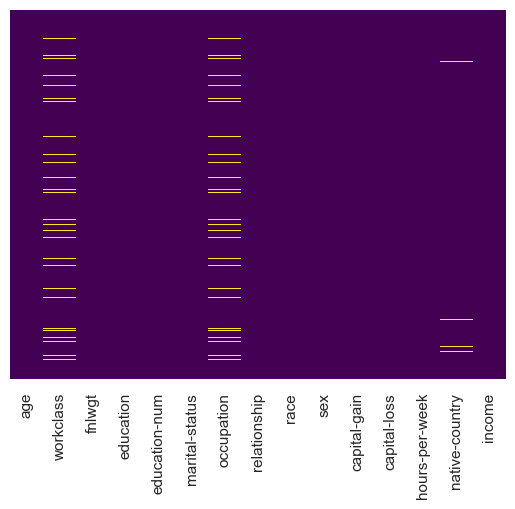

In [329]:
sns.heatmap(con.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [330]:
# fill the null values on native-country with race
con[con['native-country'].isnull()][['race', 'education', 'native-country']].head(10)

,race,education,native-country
14,Asian-Pac-Islander,Assoc-voc,None
38,White,Some-college,None
51,White,HS-grad,None
61,White,7th-8th,None
93,Asian-Pac-Islander,HS-grad,None
245,White,HS-grad,None
249,White,HS-grad,None
297,Asian-Pac-Islander,Masters,None
393,White,Bachelors,None
453,Black,Assoc-acdm,None


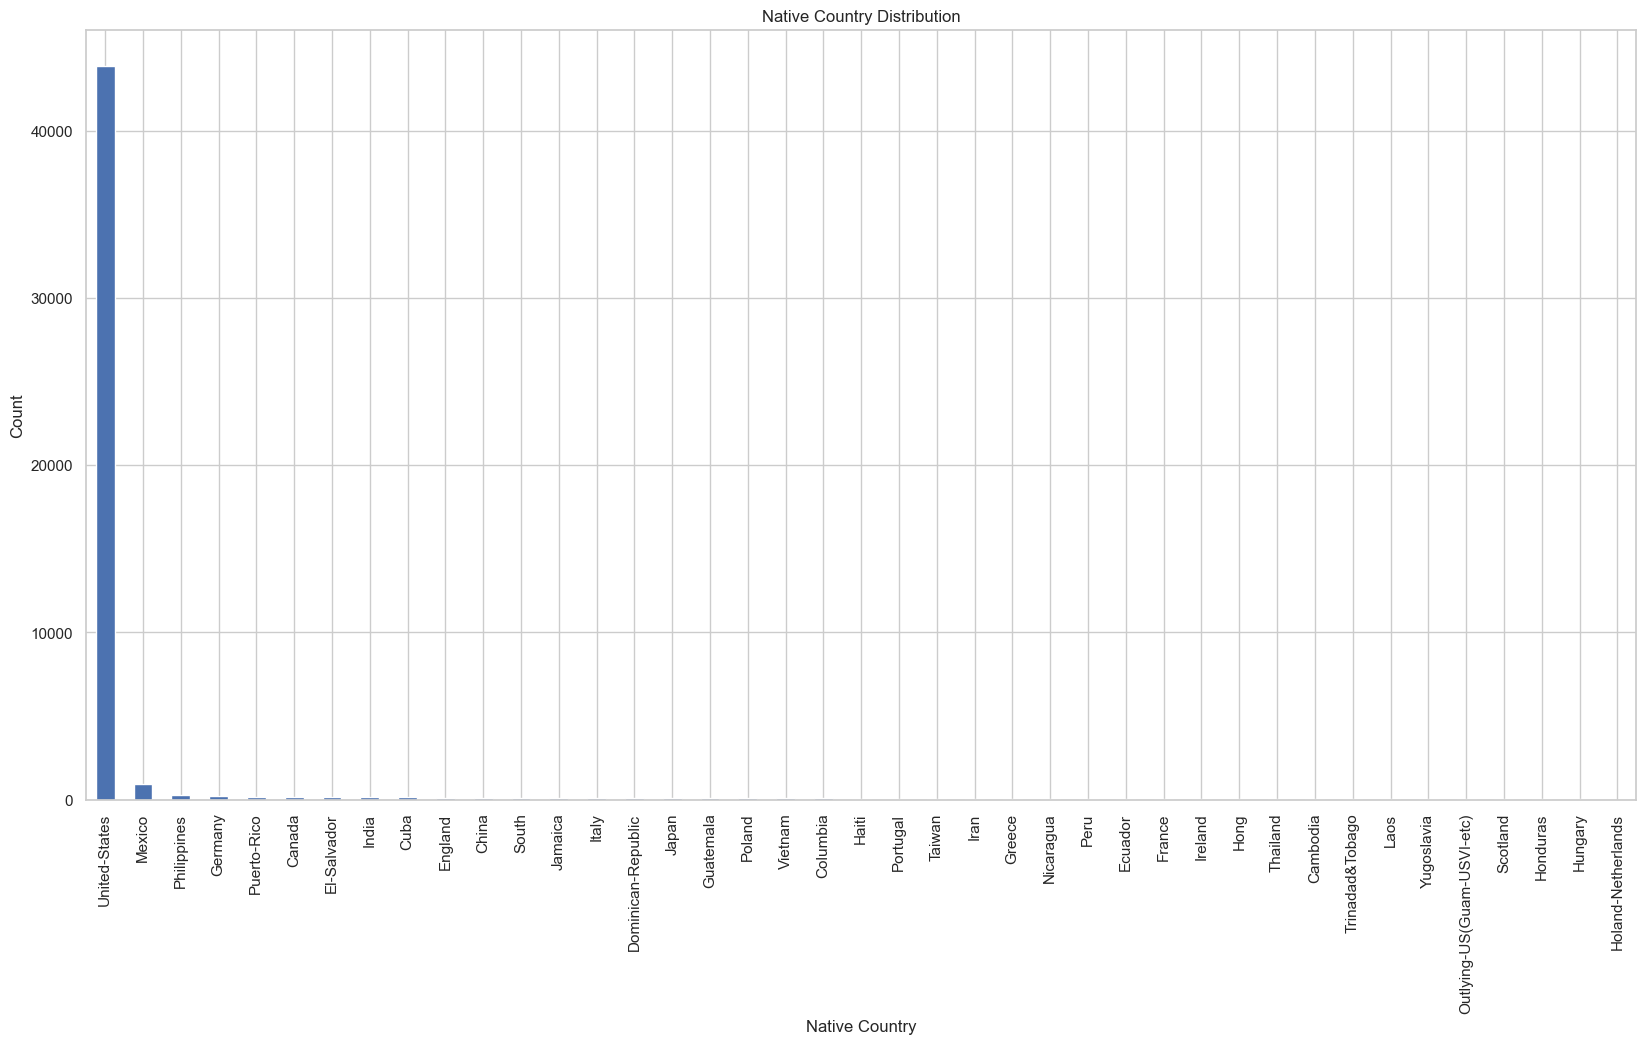

In [331]:
con['native-country'].value_counts().plot(kind='bar', figsize=(20, 10))
plt.title('Native Country Distribution')
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.show()

In [332]:
con[(con['race'] == 'Black') & (con["education"] == 'Bachelors')]["native-country"].mode()[0]

'United-States'

In [333]:
con.loc[7, ["race", "education"]].values

array(['White', 'HS-grad'], dtype=object)

In [334]:
for i in con[con['native-country'].isnull()].index:
    race, education = con.loc[i, ["race", "education"]].values
    con.loc[i, "native-country"] = con[(con['race'] == race) & (con["education"] == education)]["native-country"].mode()[0]

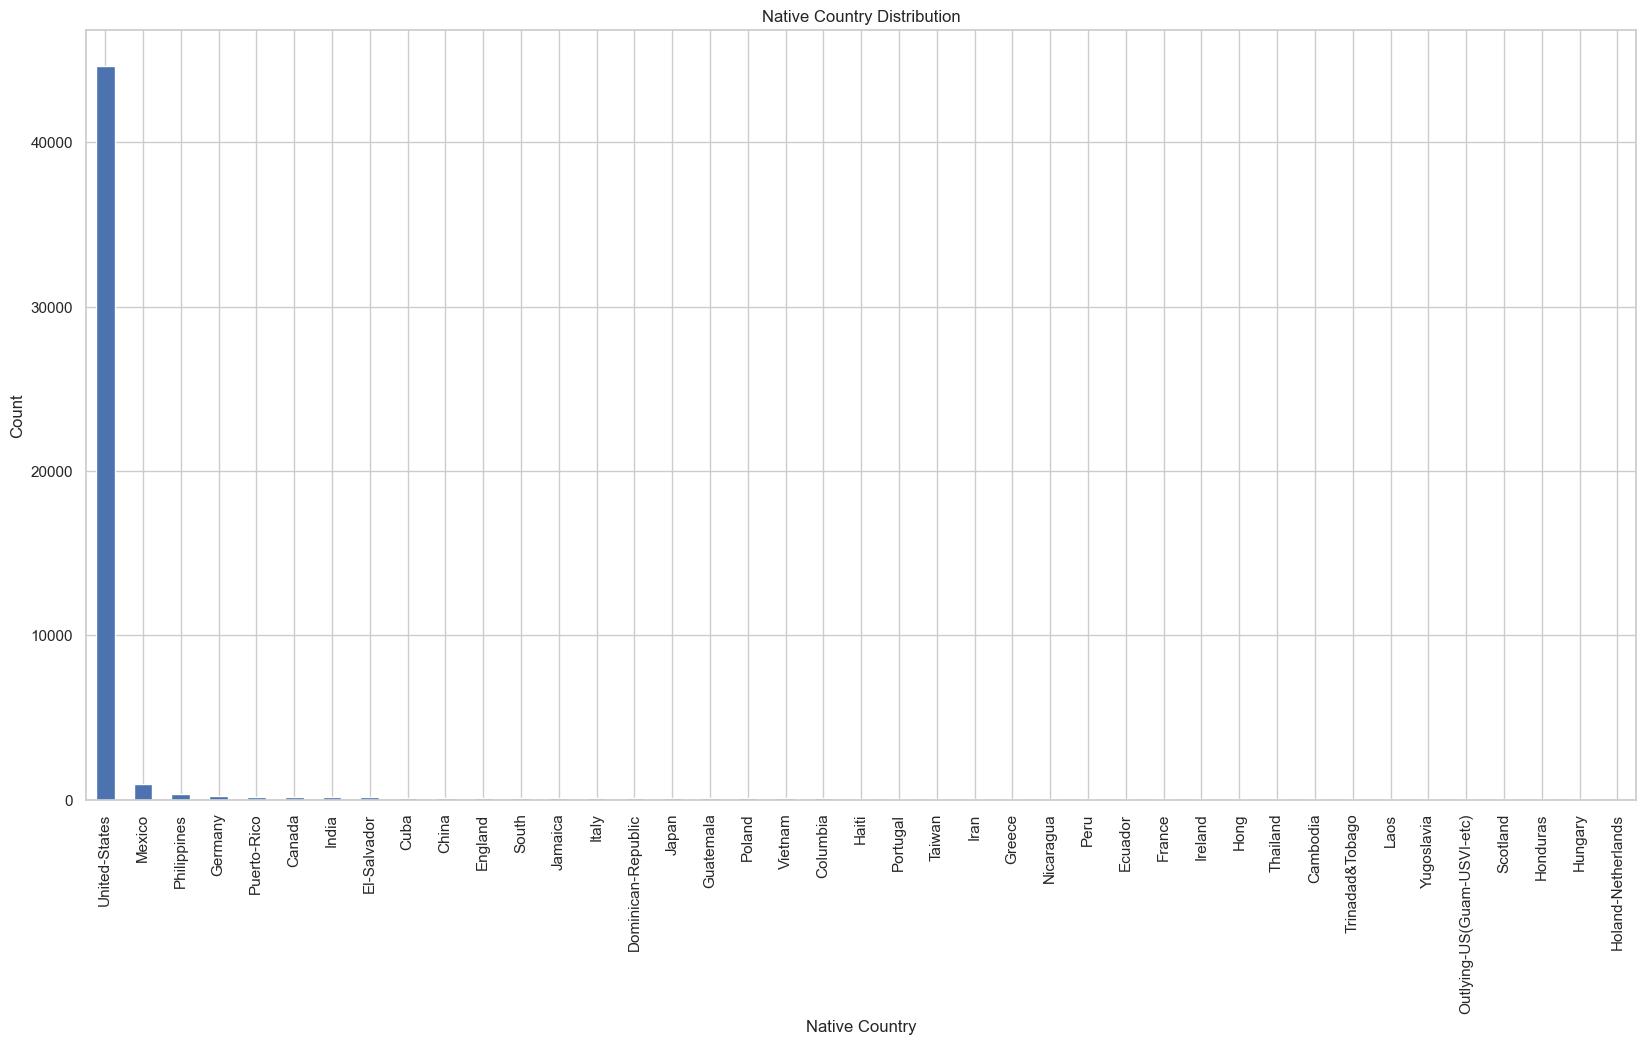

In [335]:
con['native-country'].value_counts().plot(kind='bar', figsize=(20, 10))
plt.title('Native Country Distribution')
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.show()

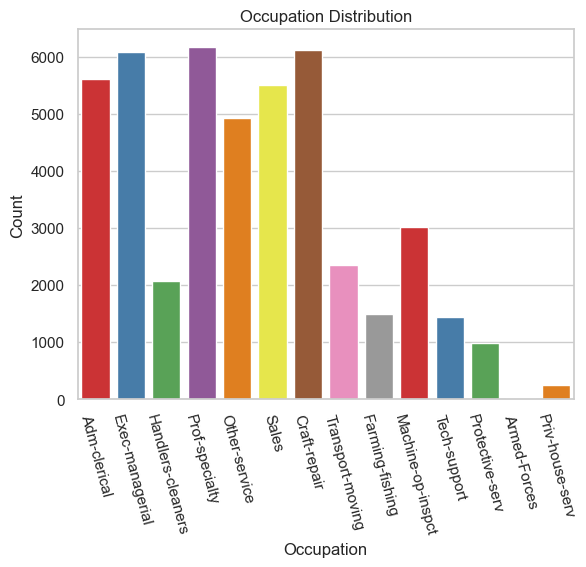

In [336]:
sns.countplot(x='occupation', data=con, palette='Set1')
plt.xticks(rotation=-75)
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

In [337]:
# fill the null values on occupation with race
con[con['occupation'].isnull()][['race', 'education', 'income', 'occupation']].head(10)

,race,education,income,occupation
27,Asian-Pac-Islander,Some-college,>50K,None
61,White,7th-8th,<=50K,None
69,White,Some-college,<=50K,None
77,White,10th,<=50K,None
106,White,10th,<=50K,None
128,White,HS-grad,<=50K,None
149,White,Some-college,<=50K,None
154,White,HS-grad,>50K,None
160,White,1st-4th,<=50K,None
187,White,Bachelors,<=50K,None


In [338]:
for i in con[con['occupation'].isnull()].index:
    race, education, income= con.loc[i, ["race", "education", "income"]].values
    con.loc[i, "occupation"] = con[(con['race'] == race) & (con["education"] == education) & (con["income"] == income)]["occupation"].mode()[0]

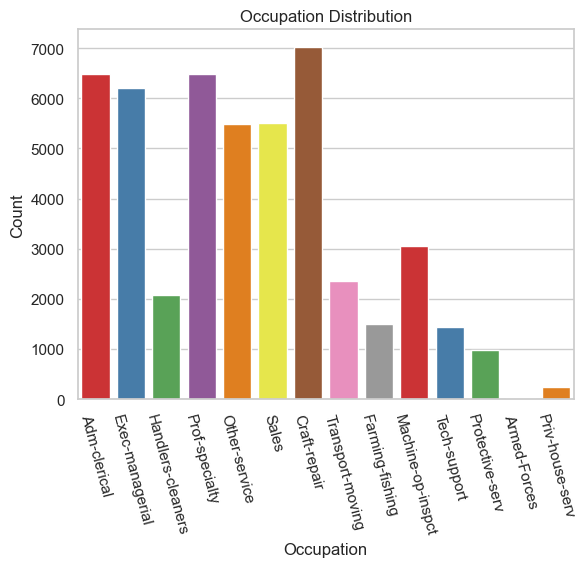

In [339]:
sns.countplot(x='occupation', data=con, palette='Set1')
plt.xticks(rotation=-75)
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

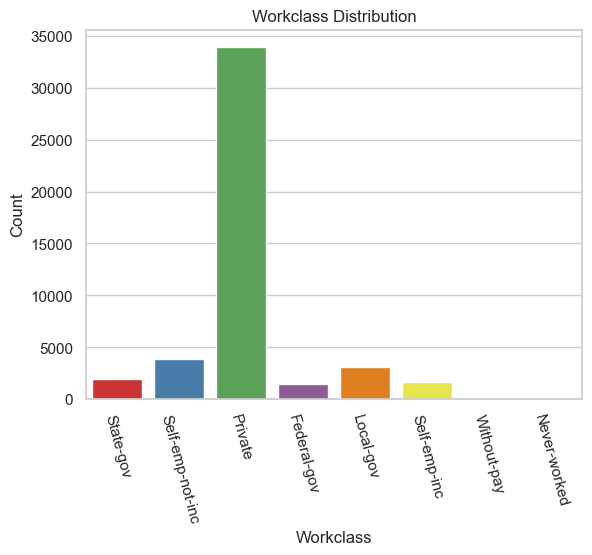

In [340]:
sns.countplot(x='workclass', data=con, palette='Set1')
plt.xticks(rotation=-75)
plt.title('Workclass Distribution')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.show()

In [341]:
con[con['workclass'].isnull()][['race', 'education', 'income', 'occupation', 'workclass']].head(10)

,race,education,income,occupation,workclass
27,Asian-Pac-Islander,Some-college,>50K,Craft-repair,None
61,White,7th-8th,<=50K,Craft-repair,None
69,White,Some-college,<=50K,Adm-clerical,None
77,White,10th,<=50K,Other-service,None
106,White,10th,<=50K,Other-service,None
128,White,HS-grad,<=50K,Craft-repair,None
149,White,Some-college,<=50K,Adm-clerical,None
154,White,HS-grad,>50K,Craft-repair,None
160,White,1st-4th,<=50K,Other-service,None
187,White,Bachelors,<=50K,Prof-specialty,None


In [342]:
for i in con[con['workclass'].isnull()].index:
    race, education, income, occupation= con.loc[i, ["race", "education", "income", "occupation"]].values
    con.loc[i, "workclass"] = con[(con['race'] == race) & (con["education"] == education) & (con["income"] == income) & (con["occupation"] == occupation)]["workclass"].mode()[0]

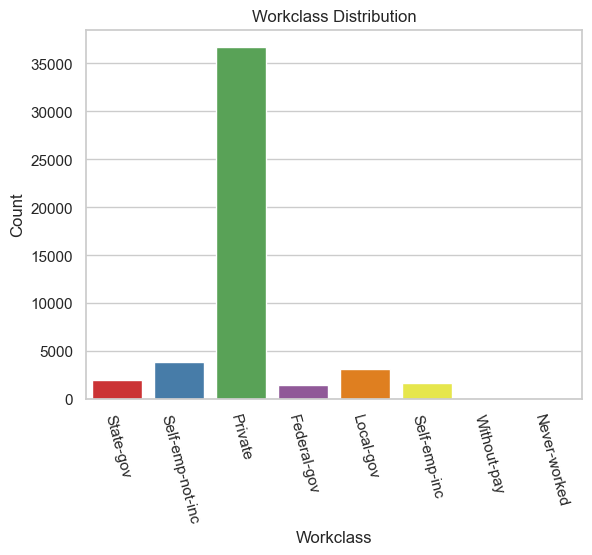

In [343]:
sns.countplot(x='workclass', data=con, palette='Set1')
plt.xticks(rotation=-75)
plt.title('Workclass Distribution')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.show()

<Axes: >

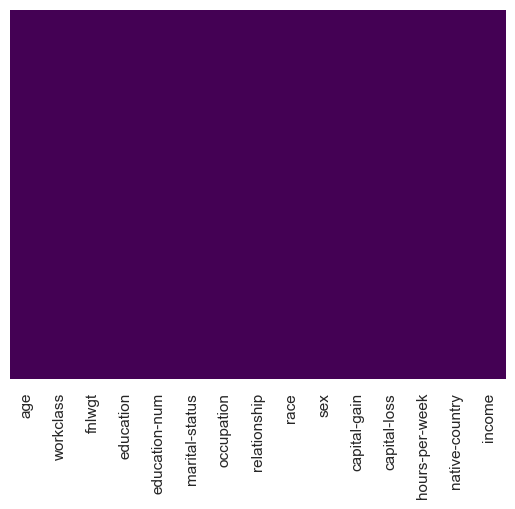

In [344]:
sns.heatmap(con.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [345]:
con.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [346]:
con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### preprocessing the data and fix the data types

In [347]:
# change the data types from object to category
for col in con.columns:
    if con[col].dtype == 'object':
        con[col] = con[col].astype('category')
        print(f"Column '{col}' changed to category data type.")

Column 'workclass' changed to category data type.
Column 'education' changed to category data type.
Column 'marital-status' changed to category data type.
Column 'occupation' changed to category data type.
Column 'relationship' changed to category data type.
Column 'race' changed to category data type.
Column 'sex' changed to category data type.
Column 'native-country' changed to category data type.
Column 'income' changed to category data type.


In [348]:
con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   workclass       48842 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education-num   48842 non-null  int64   
 5   marital-status  48842 non-null  category
 6   occupation      48842 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital-gain    48842 non-null  int64   
 11  capital-loss    48842 non-null  int64   
 12  hours-per-week  48842 non-null  int64   
 13  native-country  48842 non-null  category
 14  income          48842 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.7 MB


In [349]:
con['workclass'].value_counts()

workclass
Private             36687
Self-emp-not-inc     3866
Local-gov            3144
State-gov            1982
Self-emp-inc         1695
Federal-gov          1437
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [350]:
def simplify_workclass(x):
    if x in ['Self-emp-not-inc', 'Self-emp-inc']:
        return 'Self-employed'
    elif x in ['Local-gov', 'State-gov', 'Federal-gov']:
        return 'Government'
    elif x in ['Without-pay', 'Never-worked']:
        return 'Unemployed'
    else:
        return x

con['workclass'] = con['workclass'].apply(simplify_workclass)
con['workclass'].value_counts()

workclass
Private          36687
Government        6563
Self-employed     5561
Unemployed          31
Name: count, dtype: int64

In [351]:
con['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [352]:
def simplify_marital_status(x):
    if x in ['Married-civ-spouse', 'Married-AF-spouse', 'Married-spouse-absent']:
        return 'Married'
    elif x == 'Never-married':
        return 'Single'
    else:
        return 'Not Married'

con['marital-status'] = con['marital-status'].apply(simplify_marital_status)


In [353]:
con['marital-status'].value_counts()

marital-status
Married        23044
Single         16117
Not Married     9681
Name: count, dtype: int64

In [354]:
con['relationship'].value_counts()

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

In [355]:
def simplify_relationship(x):
    if x in ['Husband', 'Wife']:
        return 'Married'
    elif x in ['Not-in-family', 'Unmarried']:
        return 'Single'
    elif x == 'Own-child':
        return 'Child'
    else:
        return 'Relative'

con['relationship'] = con['relationship'].apply(simplify_relationship)


In [356]:
con['relationship'].value_counts()

relationship
Married     22047
Single      17708
Child        7581
Relative     1506
Name: count, dtype: int64

## Preparing data for split

In [357]:
con.drop(['education'], axis=1, inplace=True)

In [359]:
con['income'] = con['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [361]:
con['income'] = con['income'].astype('bool')

In [368]:
# apply one hot encoding to just the categorical columns with drop_first=True
# check the columns data types
categorical_columns = con.select_dtypes(include=['category', 'O']).columns
con = pd.get_dummies(con, columns=categorical_columns, drop_first=True)
con.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Private,workclass_Self-employed,workclass_Unemployed,marital-status_Not Married,marital-status_Single,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Married,relationship_Relative,relationship_Single,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [369]:
con.shape

(48842, 73)

In [370]:
con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 73 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        48842 non-null  int64
 1   fnlwgt                                     48842 non-null  int64
 2   education-num                              48842 non-null  int64
 3   capital-gain                               48842 non-null  int64
 4   capital-loss                               48842 non-null  int64
 5   hours-per-week                             48842 non-null  int64
 6   income                                     48842 non-null  bool 
 7   workclass_Private                          48842 non-null  bool 
 8   workclass_Self-employed                    48842 non-null  bool 
 9   workclass_Unemployed                       48842 non-null  bool 
 10  marital-status_Not Married                 488

In [371]:
train_data = con[:32561]
test_data = con[32561:]

In [372]:
X = train_data.drop('income', axis=1)
y = train_data['income']

In [374]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [375]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

income
False    0.500152
True     0.499848
Name: proportion, dtype: float64
income
True     0.500607
False    0.499393
Name: proportion, dtype: float64


In [384]:
def train_test_model(models, X_train, y_train, X_val, y_val):
    scores = []

    for model in models:
        for i in range(8):
            model_name = model.__class__.__name__
            if i == 0:
                model_name = model_name + ' (Raw)'
                mX_train = X_train
                mX_val = X_val
                scaler = None
                poly_d_2 = None
            
            elif i == 1:
                model_name = model_name + ' (StandardScaler)'
                stand_scaler = StandardScaler()
                mX_train = stand_scaler.fit_transform(X_train)
                mX_val = stand_scaler.transform(X_val)
                scaler = stand_scaler
                poly_d_2 = None


            elif i == 2:
                model_name = model_name + ' (MinMaxScaler)'
                minmax_scaler = MinMaxScaler()
                mX_train = minmax_scaler.fit_transform(X_train)
                mX_val = minmax_scaler.transform(X_val)
                scaler = minmax_scaler
            
            elif i == 3:
                model_name = model_name + ' (PolynomialFeatures)'
                poly = PolynomialFeatures(degree=2)
                mX_train = poly.fit_transform(X_train)
                mX_val = poly.transform(X_val)
                scaler = None
                poly_d_2 = poly
            

            elif i == 4:
                model_name = model_name + ' (PolynomialFeatures + StandardScaler)'
                poly = PolynomialFeatures(degree=2)
                stand_scaler = StandardScaler()
                mX_train = poly.fit_transform(X_train)
                mX_val = poly.transform(X_val)
                mX_train = stand_scaler.fit_transform(mX_train)
                mX_val = stand_scaler.transform(mX_val)
                scaler = stand_scaler
                poly_d_2 = poly

            elif i == 5:
                model_name = model_name + ' (PolynomialFeatures + MinMaxScaler)'
                poly = PolynomialFeatures(degree=2)
                minmax_scaler = MinMaxScaler()
                mX_train = poly.fit_transform(X_train)
                mX_val = poly.transform(X_val)
                mX_train = minmax_scaler.fit_transform(mX_train)
                mX_val = minmax_scaler.transform(mX_val)
                scaler = minmax_scaler
                poly_d_2 = poly

            elif i == 6:
                model_name = model_name + ' (RobustScaler)'
                robust_scaler = RobustScaler()
                mX_train = robust_scaler.fit_transform(X_train)
                mX_val = robust_scaler.transform(X_val)
                scaler = robust_scaler
                poly_d_2 = None
            
            elif i == 7:
                model_name = model_name + ' (RobustScaler + PolynomialFeatures)'
                robust_scaler = RobustScaler()
                poly = PolynomialFeatures(degree=2)
                mX_train = poly.fit_transform(X_train)
                mX_val = poly.transform(X_val)
                mX_train = robust_scaler.fit_transform(mX_train)
                mX_val = robust_scaler.transform(mX_val)
                scaler = robust_scaler
                poly_d_2 = poly


            print(f"Training {model_name}...")
            model.fit(mX_train, y_train)
            y_pred = model.predict(mX_val)
            accuracy = accuracy_score(y_val, y_pred)
            f1 = f1_score(y_val, y_pred)
            recall = recall_score(y_val, y_pred)
            precision = precision_score(y_val, y_pred)
            evaluate_model = {'Model': model,
                            'Model name':model_name,
                            'Scaler': scaler,
                            'Polynomial Features': poly_d_2,
                            'Accuracy': accuracy,
                            'F1 Score': f1,
                            'Recall': recall,
                            'Precision': precision}
            scores.append(evaluate_model)

            print(f"Model: {model_name}, Accuracy: {accuracy:.2f}%, F1 Score: {f1:.2f}, Recall: {recall:.2f}, Precision: {precision:.2f}")
            # Plotting the confusion matrix
            cm = confusion_matrix(y_val, y_pred)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
            plt.title(f'Confusion Matrix for {model_name}')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.show()
            print(classification_report(y_val, y_pred))
            print('-----------------------------------')
            
    return scores

Training LogisticRegression (Raw)...
Model: LogisticRegression (Raw), Accuracy: 0.69%, F1 Score: 0.67, Recall: 0.63, Precision: 0.72


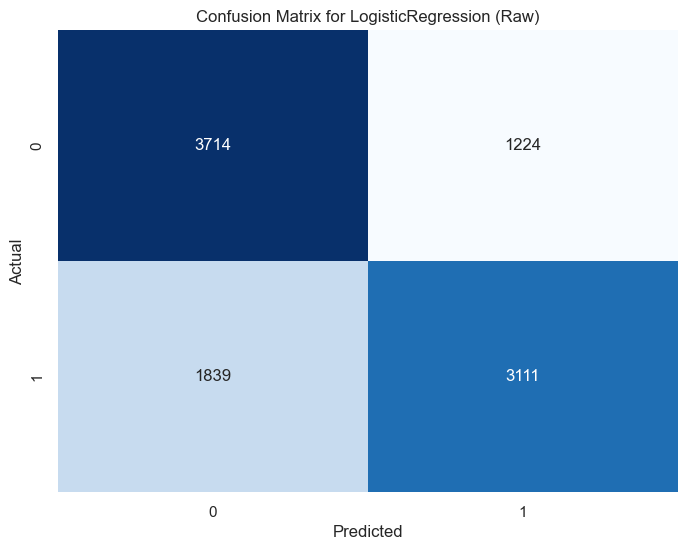

              precision    recall  f1-score   support

       False       0.67      0.75      0.71      4938
        True       0.72      0.63      0.67      4950

    accuracy                           0.69      9888
   macro avg       0.69      0.69      0.69      9888
weighted avg       0.69      0.69      0.69      9888

-----------------------------------
Training LogisticRegression (StandardScaler)...
Model: LogisticRegression (StandardScaler), Accuracy: 0.89%, F1 Score: 0.89, Recall: 0.89, Precision: 0.88


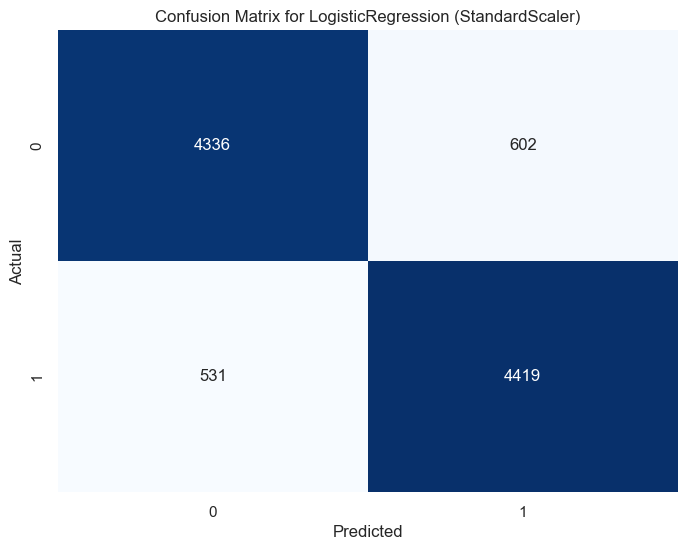

              precision    recall  f1-score   support

       False       0.89      0.88      0.88      4938
        True       0.88      0.89      0.89      4950

    accuracy                           0.89      9888
   macro avg       0.89      0.89      0.89      9888
weighted avg       0.89      0.89      0.89      9888

-----------------------------------
Training LogisticRegression (MinMaxScaler)...
Model: LogisticRegression (MinMaxScaler), Accuracy: 0.88%, F1 Score: 0.88, Recall: 0.89, Precision: 0.88


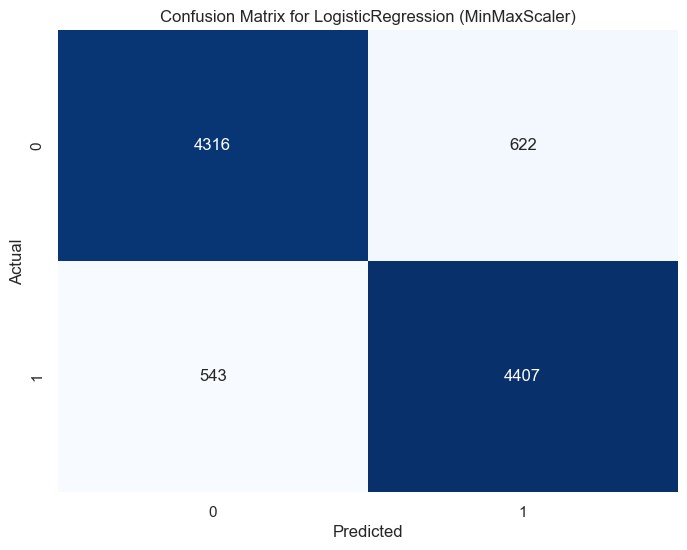

              precision    recall  f1-score   support

       False       0.89      0.87      0.88      4938
        True       0.88      0.89      0.88      4950

    accuracy                           0.88      9888
   macro avg       0.88      0.88      0.88      9888
weighted avg       0.88      0.88      0.88      9888

-----------------------------------
Training LogisticRegression (PolynomialFeatures)...
Model: LogisticRegression (PolynomialFeatures), Accuracy: 0.66%, F1 Score: 0.68, Recall: 0.73, Precision: 0.64


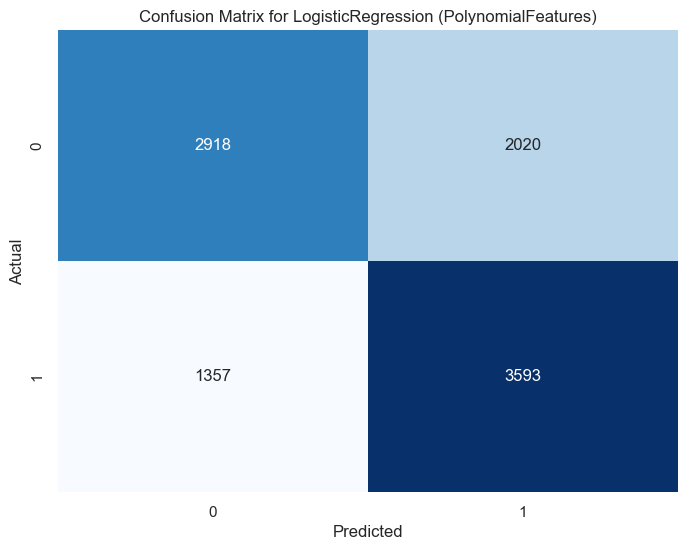

              precision    recall  f1-score   support

       False       0.68      0.59      0.63      4938
        True       0.64      0.73      0.68      4950

    accuracy                           0.66      9888
   macro avg       0.66      0.66      0.66      9888
weighted avg       0.66      0.66      0.66      9888

-----------------------------------
Training LogisticRegression (PolynomialFeatures + StandardScaler)...
Model: LogisticRegression (PolynomialFeatures + StandardScaler), Accuracy: 0.89%, F1 Score: 0.89, Recall: 0.89, Precision: 0.90


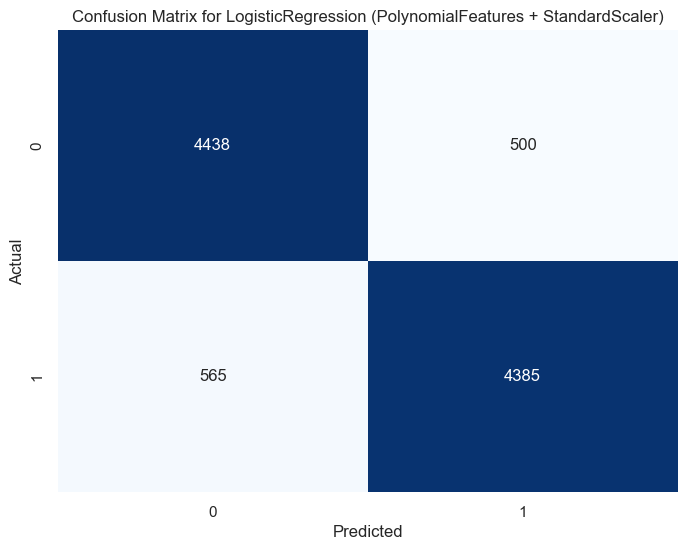

              precision    recall  f1-score   support

       False       0.89      0.90      0.89      4938
        True       0.90      0.89      0.89      4950

    accuracy                           0.89      9888
   macro avg       0.89      0.89      0.89      9888
weighted avg       0.89      0.89      0.89      9888

-----------------------------------
Training LogisticRegression (PolynomialFeatures + MinMaxScaler)...
Model: LogisticRegression (PolynomialFeatures + MinMaxScaler), Accuracy: 0.89%, F1 Score: 0.89, Recall: 0.89, Precision: 0.90


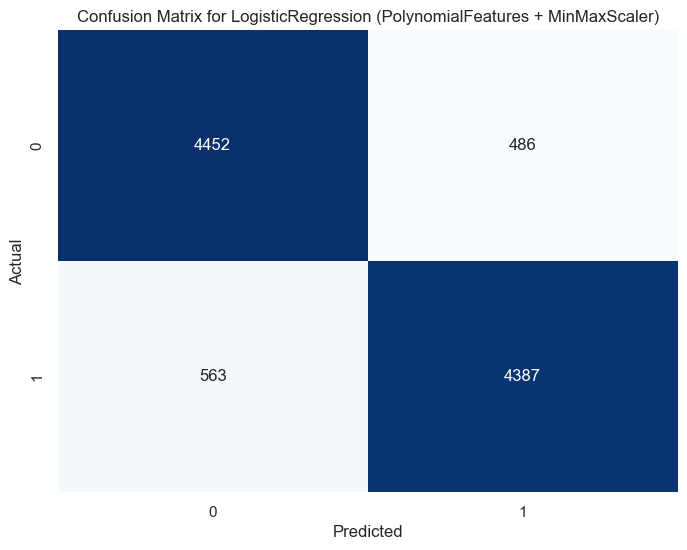

              precision    recall  f1-score   support

       False       0.89      0.90      0.89      4938
        True       0.90      0.89      0.89      4950

    accuracy                           0.89      9888
   macro avg       0.89      0.89      0.89      9888
weighted avg       0.89      0.89      0.89      9888

-----------------------------------
Training LogisticRegression (RobustScaler)...
Model: LogisticRegression (RobustScaler), Accuracy: 0.86%, F1 Score: 0.86, Recall: 0.87, Precision: 0.85


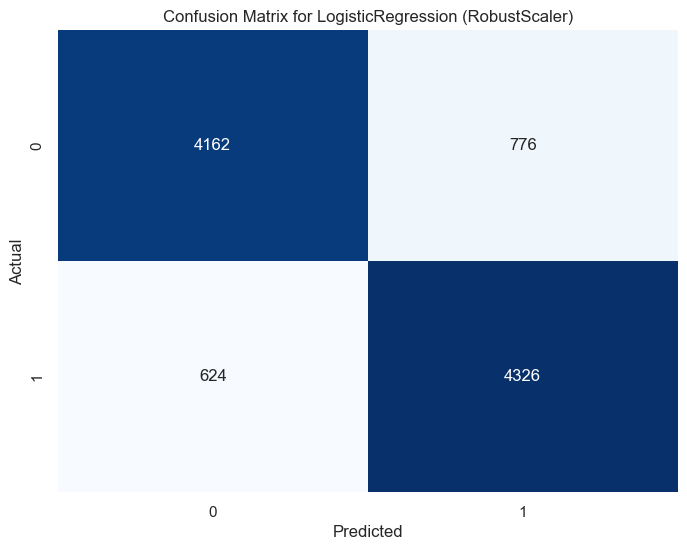

              precision    recall  f1-score   support

       False       0.87      0.84      0.86      4938
        True       0.85      0.87      0.86      4950

    accuracy                           0.86      9888
   macro avg       0.86      0.86      0.86      9888
weighted avg       0.86      0.86      0.86      9888

-----------------------------------
Training LogisticRegression (RobustScaler + PolynomialFeatures)...
Model: LogisticRegression (RobustScaler + PolynomialFeatures), Accuracy: 0.84%, F1 Score: 0.83, Recall: 0.80, Precision: 0.88


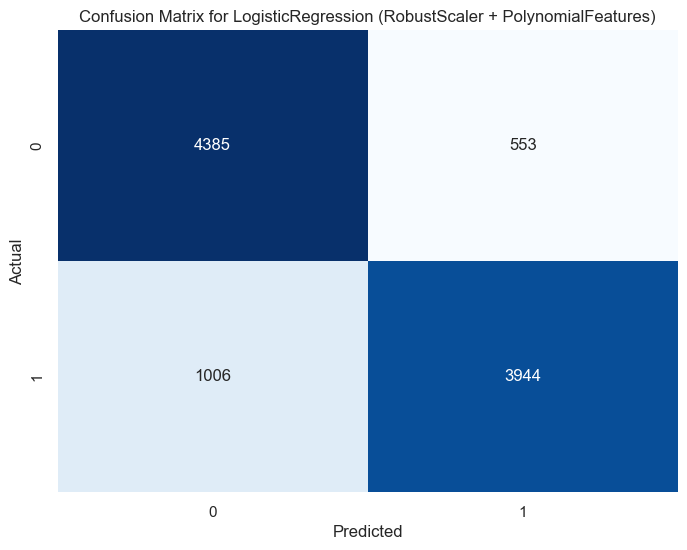

              precision    recall  f1-score   support

       False       0.81      0.89      0.85      4938
        True       0.88      0.80      0.83      4950

    accuracy                           0.84      9888
   macro avg       0.85      0.84      0.84      9888
weighted avg       0.85      0.84      0.84      9888

-----------------------------------
Training RandomForestClassifier (Raw)...
Model: RandomForestClassifier (Raw), Accuracy: 0.89%, F1 Score: 0.89, Recall: 0.89, Precision: 0.90


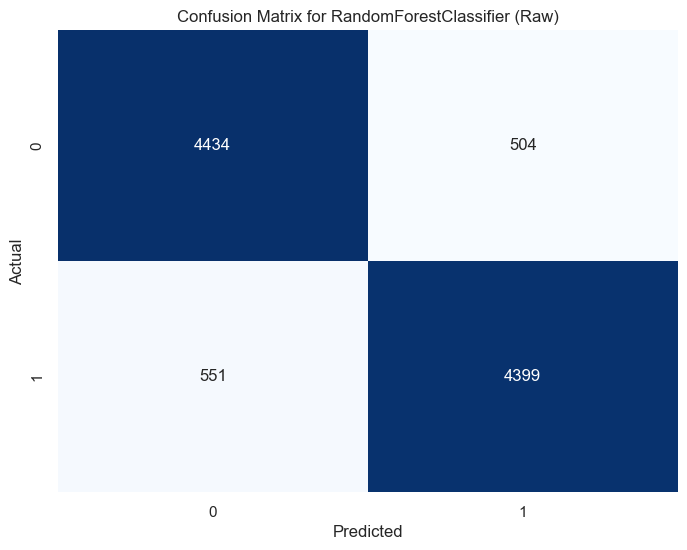

              precision    recall  f1-score   support

       False       0.89      0.90      0.89      4938
        True       0.90      0.89      0.89      4950

    accuracy                           0.89      9888
   macro avg       0.89      0.89      0.89      9888
weighted avg       0.89      0.89      0.89      9888

-----------------------------------
Training RandomForestClassifier (StandardScaler)...
Model: RandomForestClassifier (StandardScaler), Accuracy: 0.89%, F1 Score: 0.89, Recall: 0.89, Precision: 0.90


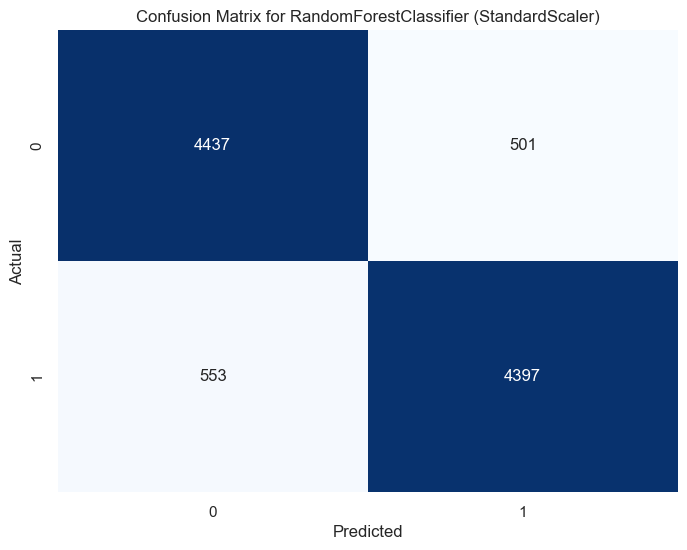

              precision    recall  f1-score   support

       False       0.89      0.90      0.89      4938
        True       0.90      0.89      0.89      4950

    accuracy                           0.89      9888
   macro avg       0.89      0.89      0.89      9888
weighted avg       0.89      0.89      0.89      9888

-----------------------------------
Training RandomForestClassifier (MinMaxScaler)...
Model: RandomForestClassifier (MinMaxScaler), Accuracy: 0.89%, F1 Score: 0.89, Recall: 0.89, Precision: 0.90


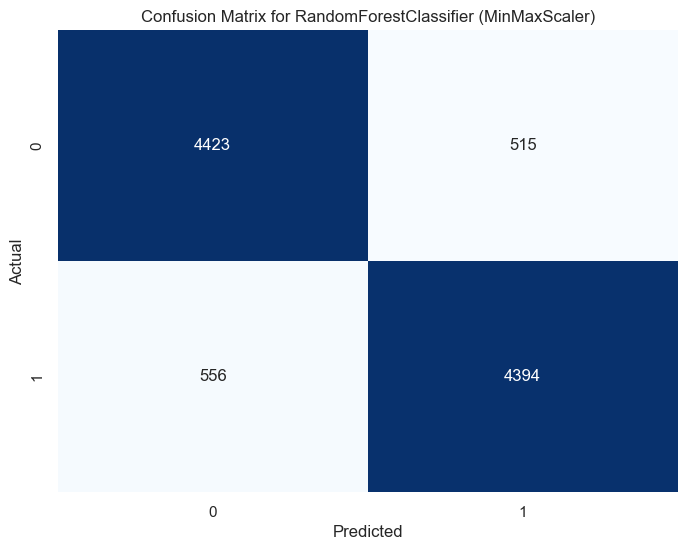

              precision    recall  f1-score   support

       False       0.89      0.90      0.89      4938
        True       0.90      0.89      0.89      4950

    accuracy                           0.89      9888
   macro avg       0.89      0.89      0.89      9888
weighted avg       0.89      0.89      0.89      9888

-----------------------------------
Training RandomForestClassifier (PolynomialFeatures)...
Model: RandomForestClassifier (PolynomialFeatures), Accuracy: 0.90%, F1 Score: 0.90, Recall: 0.89, Precision: 0.90


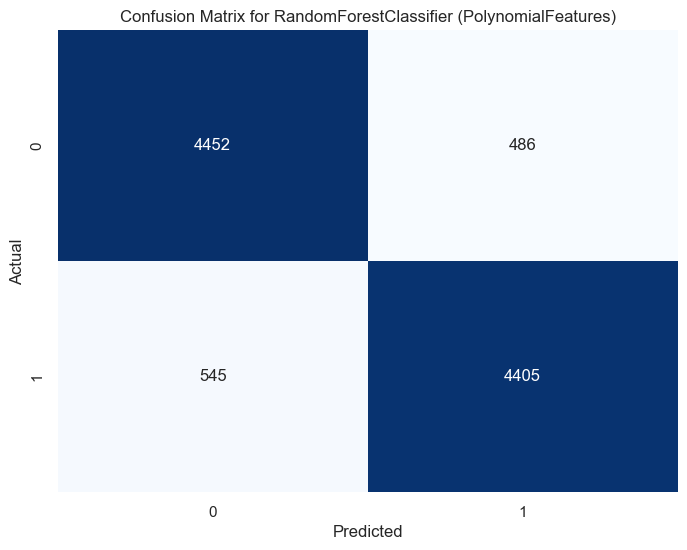

              precision    recall  f1-score   support

       False       0.89      0.90      0.90      4938
        True       0.90      0.89      0.90      4950

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888

-----------------------------------
Training RandomForestClassifier (PolynomialFeatures + StandardScaler)...
Model: RandomForestClassifier (PolynomialFeatures + StandardScaler), Accuracy: 0.89%, F1 Score: 0.89, Recall: 0.89, Precision: 0.90


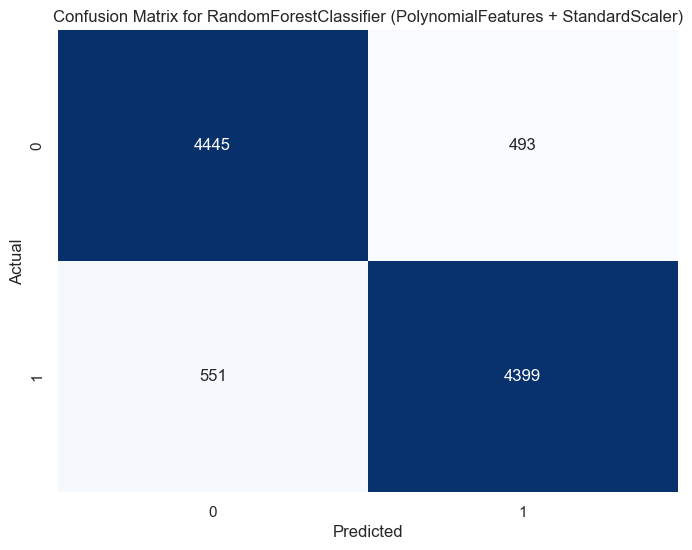

              precision    recall  f1-score   support

       False       0.89      0.90      0.89      4938
        True       0.90      0.89      0.89      4950

    accuracy                           0.89      9888
   macro avg       0.89      0.89      0.89      9888
weighted avg       0.89      0.89      0.89      9888

-----------------------------------
Training RandomForestClassifier (PolynomialFeatures + MinMaxScaler)...
Model: RandomForestClassifier (PolynomialFeatures + MinMaxScaler), Accuracy: 0.89%, F1 Score: 0.89, Recall: 0.89, Precision: 0.90


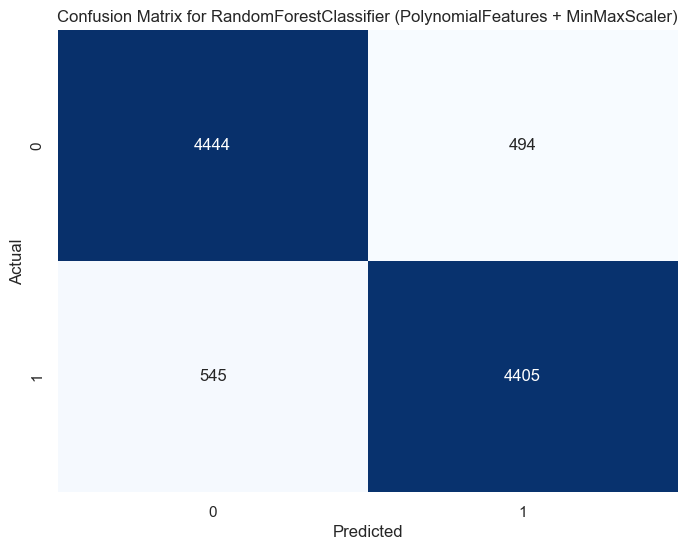

              precision    recall  f1-score   support

       False       0.89      0.90      0.90      4938
        True       0.90      0.89      0.89      4950

    accuracy                           0.89      9888
   macro avg       0.89      0.89      0.89      9888
weighted avg       0.89      0.89      0.89      9888

-----------------------------------
Training RandomForestClassifier (RobustScaler)...
Model: RandomForestClassifier (RobustScaler), Accuracy: 0.89%, F1 Score: 0.89, Recall: 0.89, Precision: 0.90


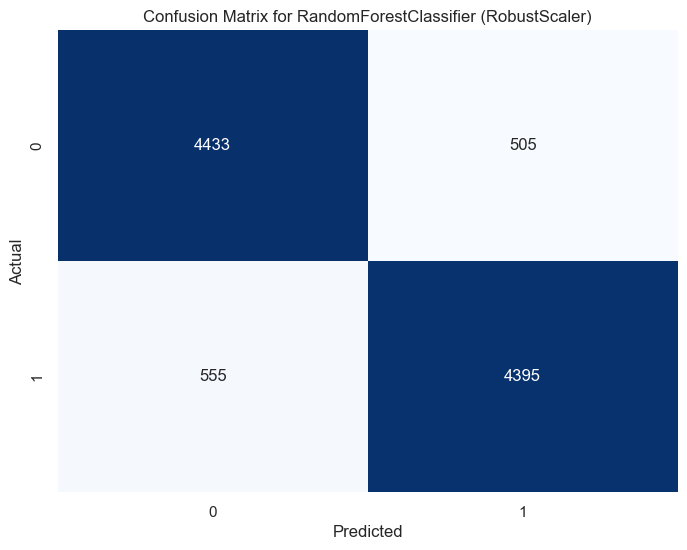

              precision    recall  f1-score   support

       False       0.89      0.90      0.89      4938
        True       0.90      0.89      0.89      4950

    accuracy                           0.89      9888
   macro avg       0.89      0.89      0.89      9888
weighted avg       0.89      0.89      0.89      9888

-----------------------------------
Training RandomForestClassifier (RobustScaler + PolynomialFeatures)...
Model: RandomForestClassifier (RobustScaler + PolynomialFeatures), Accuracy: 0.89%, F1 Score: 0.89, Recall: 0.89, Precision: 0.90


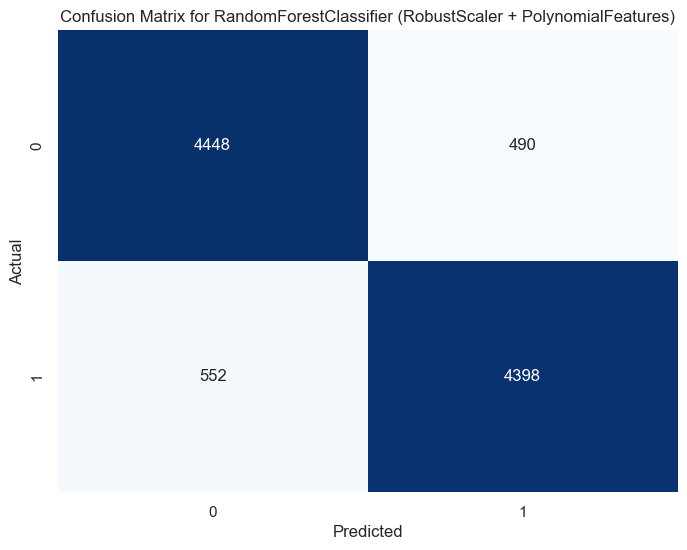

              precision    recall  f1-score   support

       False       0.89      0.90      0.90      4938
        True       0.90      0.89      0.89      4950

    accuracy                           0.89      9888
   macro avg       0.89      0.89      0.89      9888
weighted avg       0.89      0.89      0.89      9888

-----------------------------------
Training GradientBoostingClassifier (Raw)...
Model: GradientBoostingClassifier (Raw), Accuracy: 0.90%, F1 Score: 0.90, Recall: 0.90, Precision: 0.90


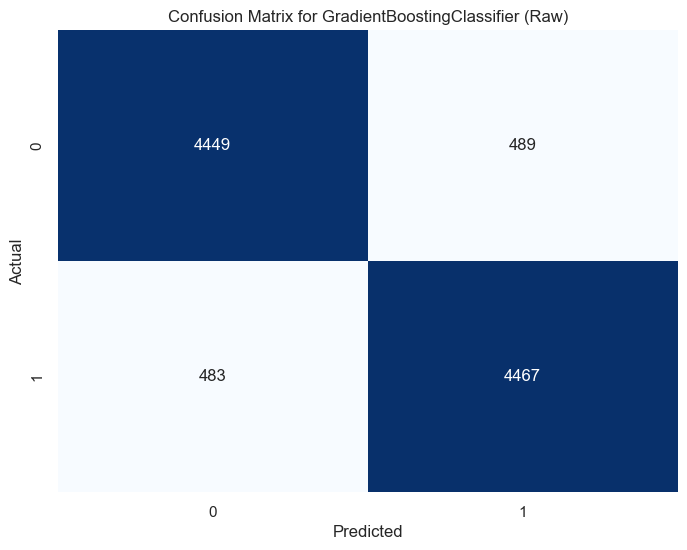

              precision    recall  f1-score   support

       False       0.90      0.90      0.90      4938
        True       0.90      0.90      0.90      4950

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888

-----------------------------------
Training GradientBoostingClassifier (StandardScaler)...
Model: GradientBoostingClassifier (StandardScaler), Accuracy: 0.90%, F1 Score: 0.90, Recall: 0.90, Precision: 0.90


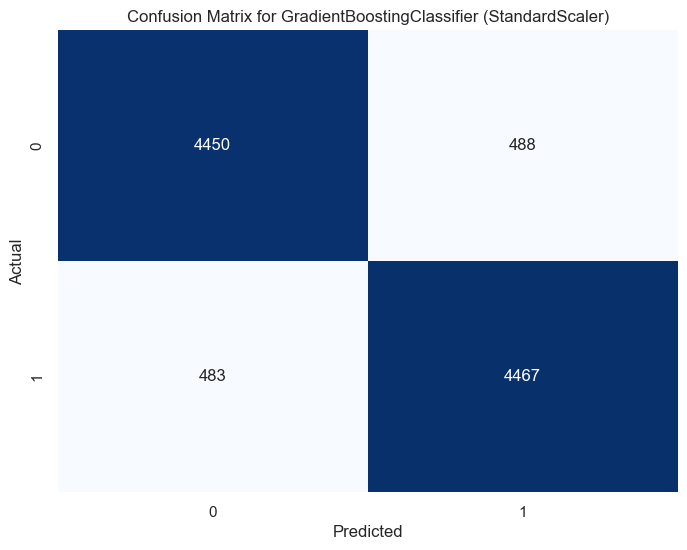

              precision    recall  f1-score   support

       False       0.90      0.90      0.90      4938
        True       0.90      0.90      0.90      4950

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888

-----------------------------------
Training GradientBoostingClassifier (MinMaxScaler)...
Model: GradientBoostingClassifier (MinMaxScaler), Accuracy: 0.90%, F1 Score: 0.90, Recall: 0.90, Precision: 0.90


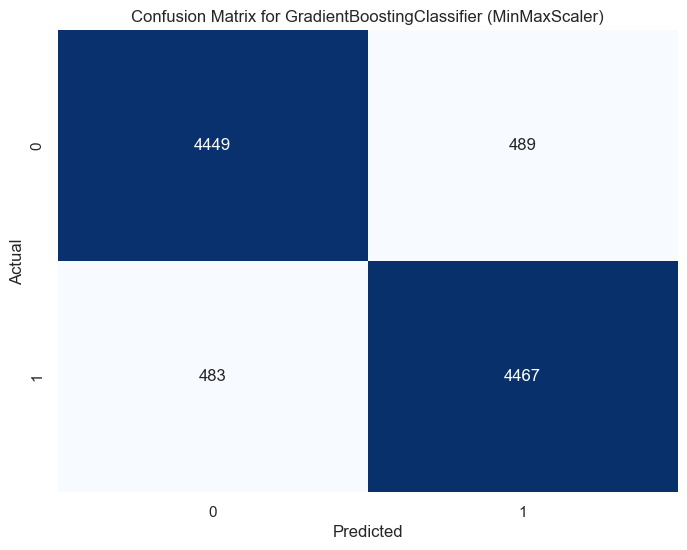

              precision    recall  f1-score   support

       False       0.90      0.90      0.90      4938
        True       0.90      0.90      0.90      4950

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888

-----------------------------------
Training GradientBoostingClassifier (PolynomialFeatures)...
Model: GradientBoostingClassifier (PolynomialFeatures), Accuracy: 0.90%, F1 Score: 0.90, Recall: 0.90, Precision: 0.90


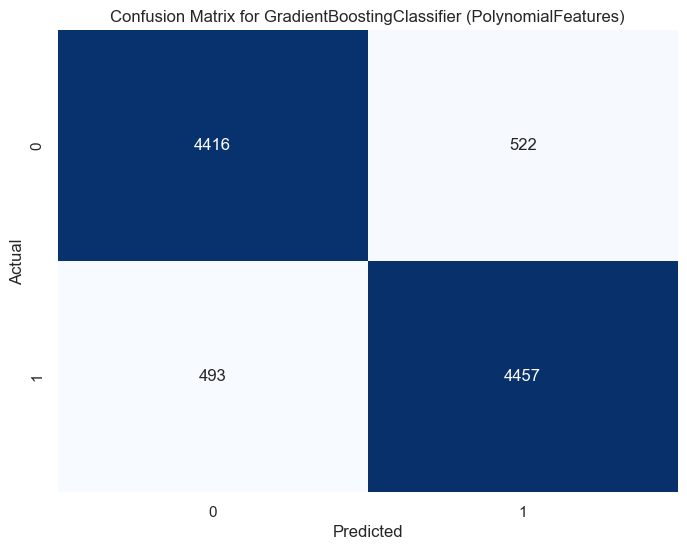

              precision    recall  f1-score   support

       False       0.90      0.89      0.90      4938
        True       0.90      0.90      0.90      4950

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888

-----------------------------------
Training GradientBoostingClassifier (PolynomialFeatures + StandardScaler)...
Model: GradientBoostingClassifier (PolynomialFeatures + StandardScaler), Accuracy: 0.90%, F1 Score: 0.90, Recall: 0.90, Precision: 0.89


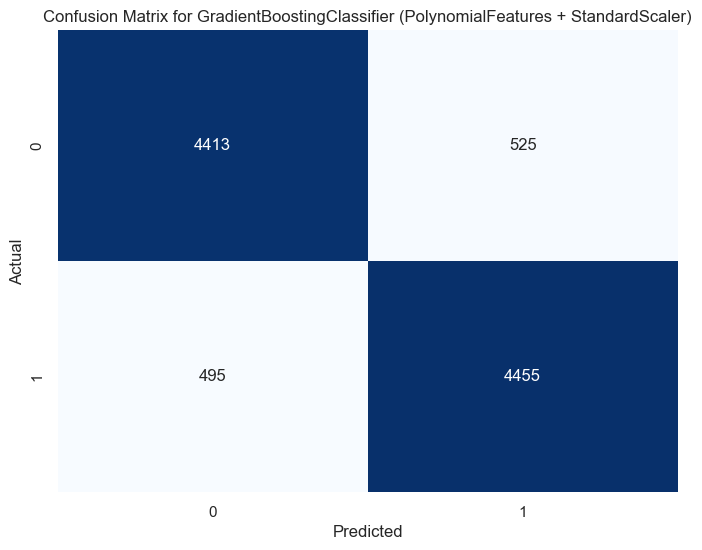

              precision    recall  f1-score   support

       False       0.90      0.89      0.90      4938
        True       0.89      0.90      0.90      4950

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888

-----------------------------------
Training GradientBoostingClassifier (PolynomialFeatures + MinMaxScaler)...
Model: GradientBoostingClassifier (PolynomialFeatures + MinMaxScaler), Accuracy: 0.90%, F1 Score: 0.90, Recall: 0.90, Precision: 0.90


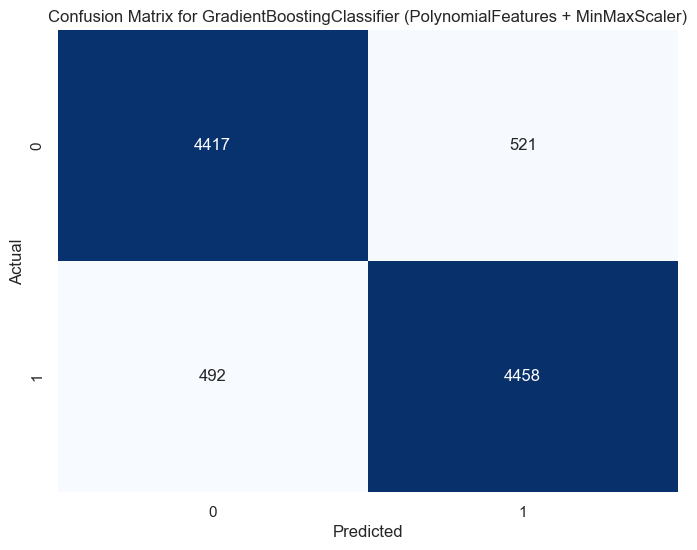

              precision    recall  f1-score   support

       False       0.90      0.89      0.90      4938
        True       0.90      0.90      0.90      4950

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888

-----------------------------------
Training GradientBoostingClassifier (RobustScaler)...
Model: GradientBoostingClassifier (RobustScaler), Accuracy: 0.90%, F1 Score: 0.90, Recall: 0.90, Precision: 0.90


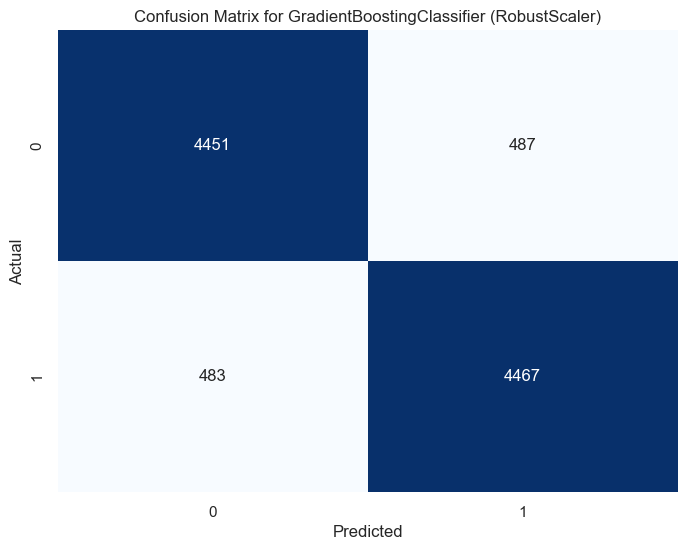

              precision    recall  f1-score   support

       False       0.90      0.90      0.90      4938
        True       0.90      0.90      0.90      4950

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888

-----------------------------------
Training GradientBoostingClassifier (RobustScaler + PolynomialFeatures)...
Model: GradientBoostingClassifier (RobustScaler + PolynomialFeatures), Accuracy: 0.90%, F1 Score: 0.90, Recall: 0.90, Precision: 0.90


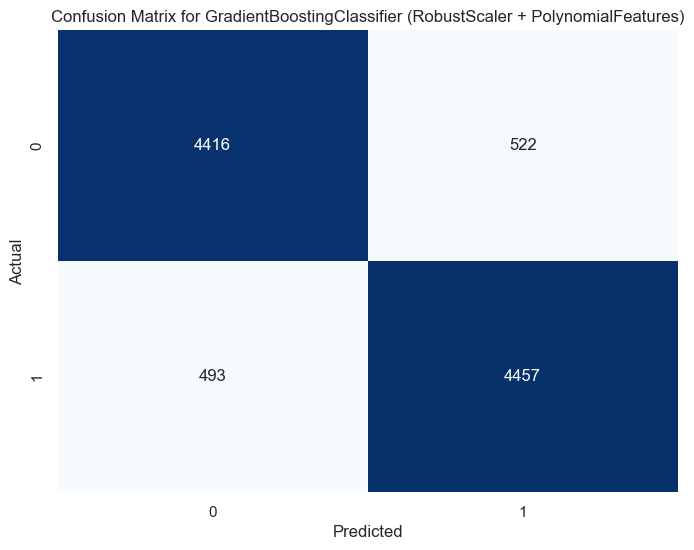

              precision    recall  f1-score   support

       False       0.90      0.89      0.90      4938
        True       0.90      0.90      0.90      4950

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888

-----------------------------------
Training AdaBoostClassifier (Raw)...
Model: AdaBoostClassifier (Raw), Accuracy: 0.89%, F1 Score: 0.89, Recall: 0.90, Precision: 0.87


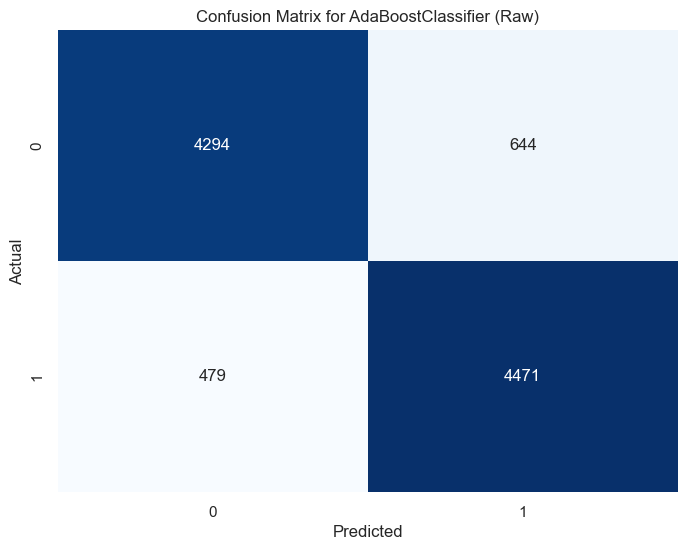

              precision    recall  f1-score   support

       False       0.90      0.87      0.88      4938
        True       0.87      0.90      0.89      4950

    accuracy                           0.89      9888
   macro avg       0.89      0.89      0.89      9888
weighted avg       0.89      0.89      0.89      9888

-----------------------------------
Training AdaBoostClassifier (StandardScaler)...
Model: AdaBoostClassifier (StandardScaler), Accuracy: 0.89%, F1 Score: 0.89, Recall: 0.90, Precision: 0.87


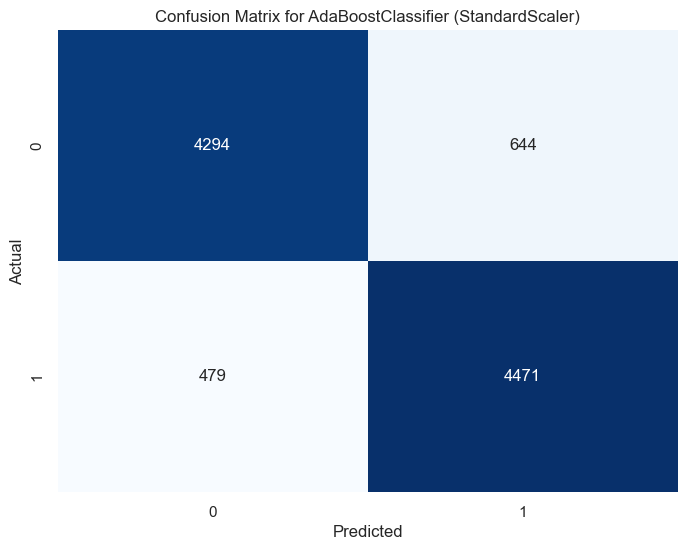

              precision    recall  f1-score   support

       False       0.90      0.87      0.88      4938
        True       0.87      0.90      0.89      4950

    accuracy                           0.89      9888
   macro avg       0.89      0.89      0.89      9888
weighted avg       0.89      0.89      0.89      9888

-----------------------------------
Training AdaBoostClassifier (MinMaxScaler)...
Model: AdaBoostClassifier (MinMaxScaler), Accuracy: 0.89%, F1 Score: 0.89, Recall: 0.90, Precision: 0.87


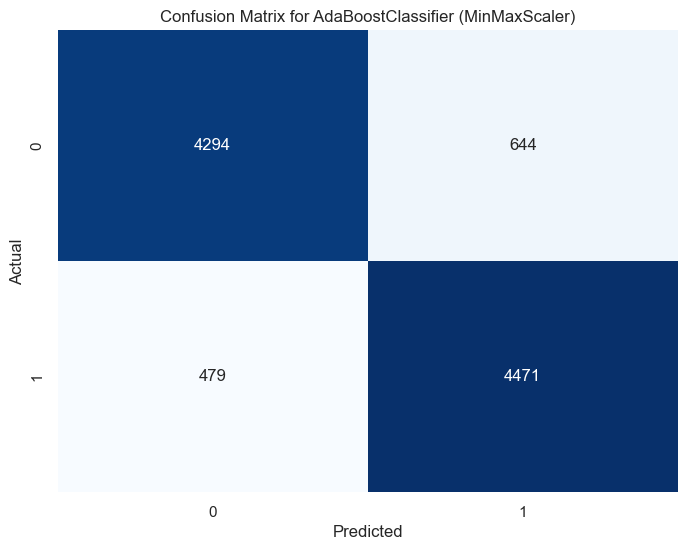

              precision    recall  f1-score   support

       False       0.90      0.87      0.88      4938
        True       0.87      0.90      0.89      4950

    accuracy                           0.89      9888
   macro avg       0.89      0.89      0.89      9888
weighted avg       0.89      0.89      0.89      9888

-----------------------------------
Training AdaBoostClassifier (PolynomialFeatures)...
Model: AdaBoostClassifier (PolynomialFeatures), Accuracy: 0.88%, F1 Score: 0.89, Recall: 0.90, Precision: 0.87


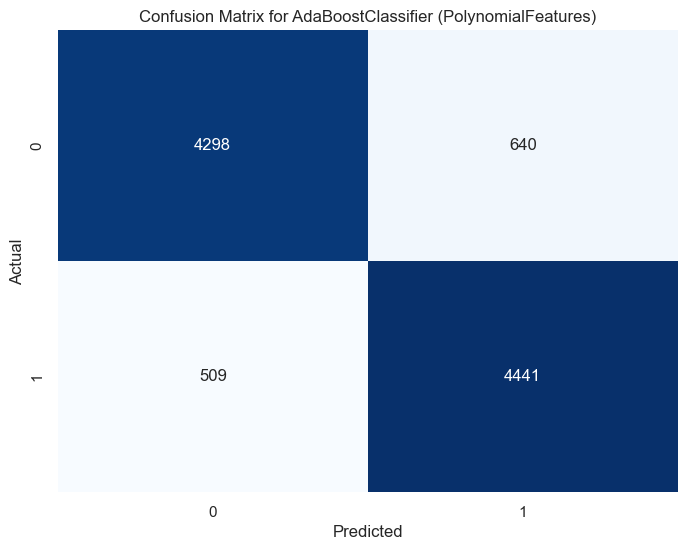

              precision    recall  f1-score   support

       False       0.89      0.87      0.88      4938
        True       0.87      0.90      0.89      4950

    accuracy                           0.88      9888
   macro avg       0.88      0.88      0.88      9888
weighted avg       0.88      0.88      0.88      9888

-----------------------------------
Training AdaBoostClassifier (PolynomialFeatures + StandardScaler)...
Model: AdaBoostClassifier (PolynomialFeatures + StandardScaler), Accuracy: 0.88%, F1 Score: 0.89, Recall: 0.90, Precision: 0.87


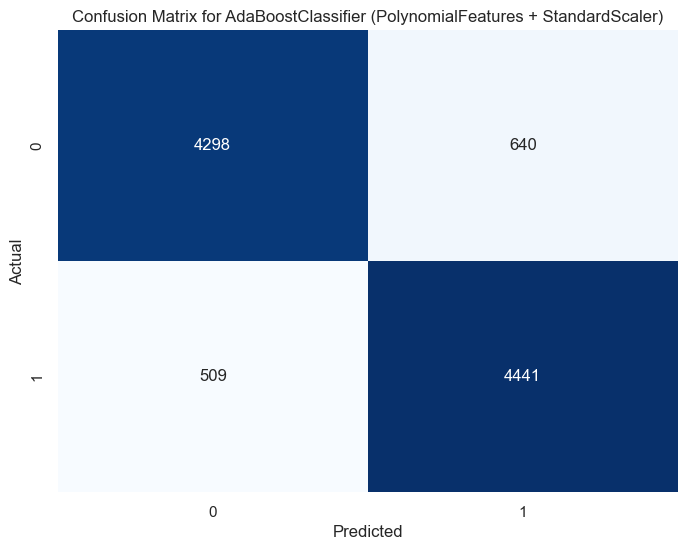

              precision    recall  f1-score   support

       False       0.89      0.87      0.88      4938
        True       0.87      0.90      0.89      4950

    accuracy                           0.88      9888
   macro avg       0.88      0.88      0.88      9888
weighted avg       0.88      0.88      0.88      9888

-----------------------------------
Training AdaBoostClassifier (PolynomialFeatures + MinMaxScaler)...
Model: AdaBoostClassifier (PolynomialFeatures + MinMaxScaler), Accuracy: 0.88%, F1 Score: 0.89, Recall: 0.90, Precision: 0.87


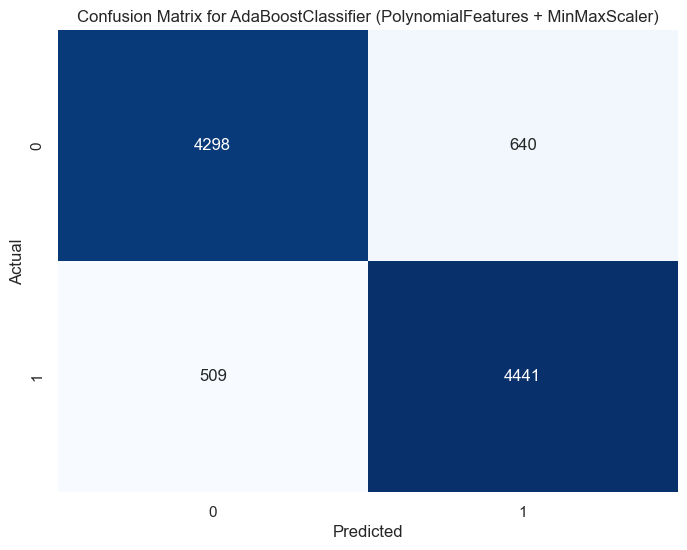

              precision    recall  f1-score   support

       False       0.89      0.87      0.88      4938
        True       0.87      0.90      0.89      4950

    accuracy                           0.88      9888
   macro avg       0.88      0.88      0.88      9888
weighted avg       0.88      0.88      0.88      9888

-----------------------------------
Training AdaBoostClassifier (RobustScaler)...
Model: AdaBoostClassifier (RobustScaler), Accuracy: 0.89%, F1 Score: 0.89, Recall: 0.90, Precision: 0.87


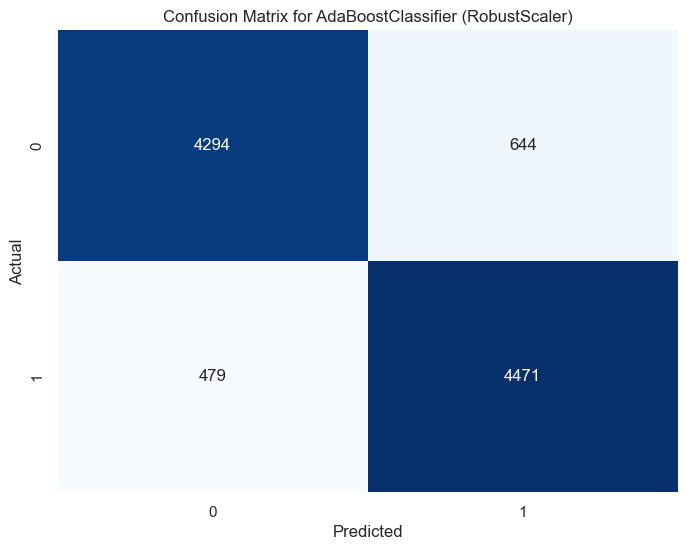

              precision    recall  f1-score   support

       False       0.90      0.87      0.88      4938
        True       0.87      0.90      0.89      4950

    accuracy                           0.89      9888
   macro avg       0.89      0.89      0.89      9888
weighted avg       0.89      0.89      0.89      9888

-----------------------------------
Training AdaBoostClassifier (RobustScaler + PolynomialFeatures)...
Model: AdaBoostClassifier (RobustScaler + PolynomialFeatures), Accuracy: 0.88%, F1 Score: 0.89, Recall: 0.90, Precision: 0.87


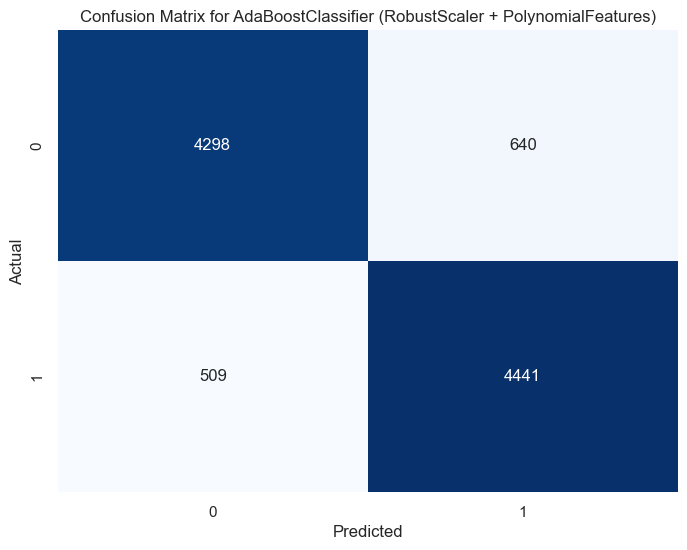

              precision    recall  f1-score   support

       False       0.89      0.87      0.88      4938
        True       0.87      0.90      0.89      4950

    accuracy                           0.88      9888
   macro avg       0.88      0.88      0.88      9888
weighted avg       0.88      0.88      0.88      9888

-----------------------------------
Training XGBClassifier (Raw)...
Model: XGBClassifier (Raw), Accuracy: 0.90%, F1 Score: 0.90, Recall: 0.90, Precision: 0.90


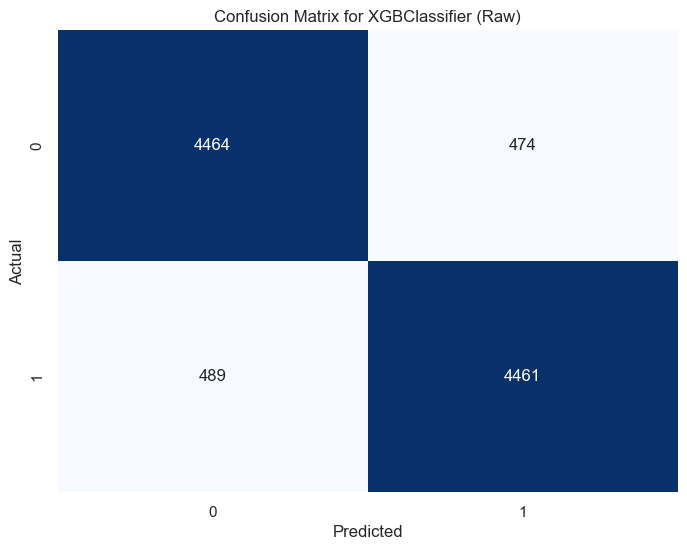

              precision    recall  f1-score   support

       False       0.90      0.90      0.90      4938
        True       0.90      0.90      0.90      4950

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888

-----------------------------------
Training XGBClassifier (StandardScaler)...
Model: XGBClassifier (StandardScaler), Accuracy: 0.90%, F1 Score: 0.90, Recall: 0.90, Precision: 0.90


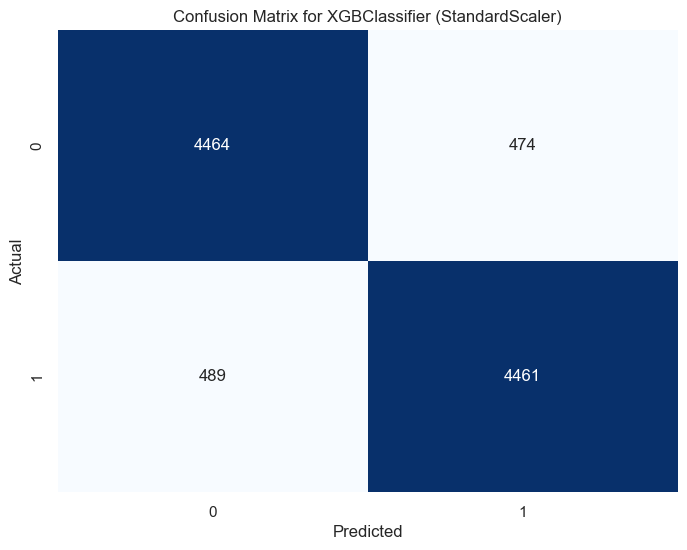

              precision    recall  f1-score   support

       False       0.90      0.90      0.90      4938
        True       0.90      0.90      0.90      4950

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888

-----------------------------------
Training XGBClassifier (MinMaxScaler)...
Model: XGBClassifier (MinMaxScaler), Accuracy: 0.90%, F1 Score: 0.90, Recall: 0.90, Precision: 0.90


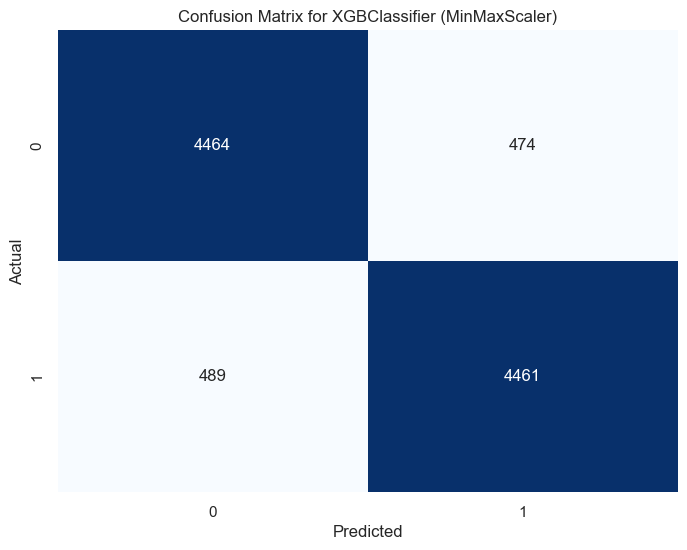

              precision    recall  f1-score   support

       False       0.90      0.90      0.90      4938
        True       0.90      0.90      0.90      4950

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888

-----------------------------------
Training XGBClassifier (PolynomialFeatures)...
Model: XGBClassifier (PolynomialFeatures), Accuracy: 0.90%, F1 Score: 0.90, Recall: 0.90, Precision: 0.90


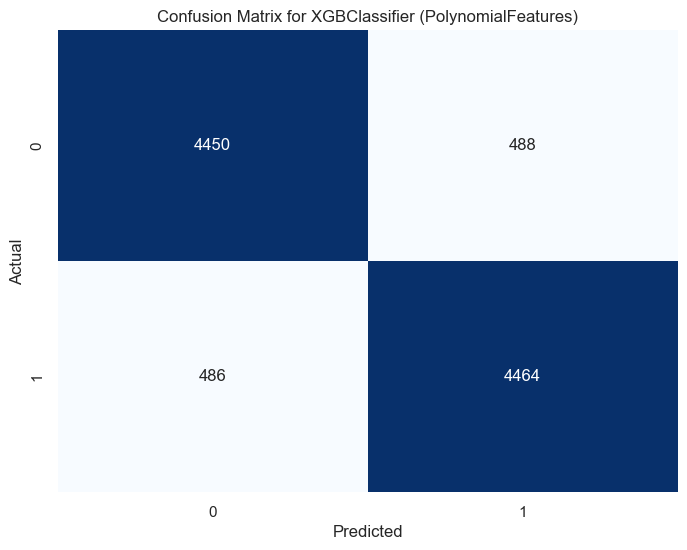

              precision    recall  f1-score   support

       False       0.90      0.90      0.90      4938
        True       0.90      0.90      0.90      4950

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888

-----------------------------------
Training XGBClassifier (PolynomialFeatures + StandardScaler)...
Model: XGBClassifier (PolynomialFeatures + StandardScaler), Accuracy: 0.90%, F1 Score: 0.90, Recall: 0.90, Precision: 0.90


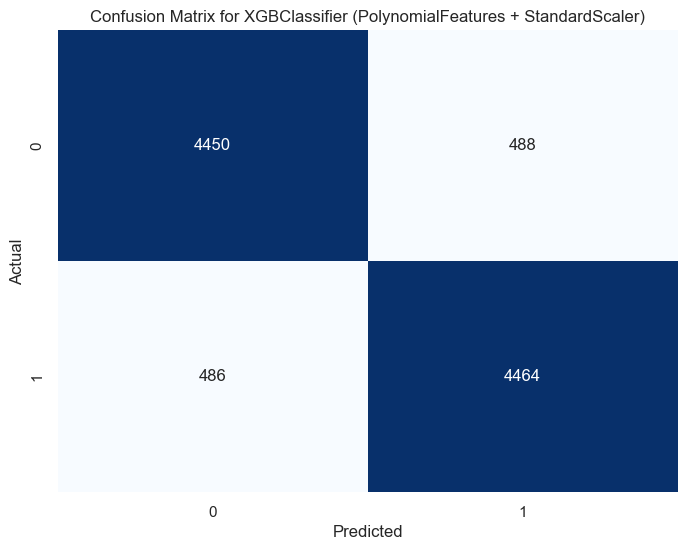

              precision    recall  f1-score   support

       False       0.90      0.90      0.90      4938
        True       0.90      0.90      0.90      4950

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888

-----------------------------------
Training XGBClassifier (PolynomialFeatures + MinMaxScaler)...
Model: XGBClassifier (PolynomialFeatures + MinMaxScaler), Accuracy: 0.90%, F1 Score: 0.90, Recall: 0.90, Precision: 0.90


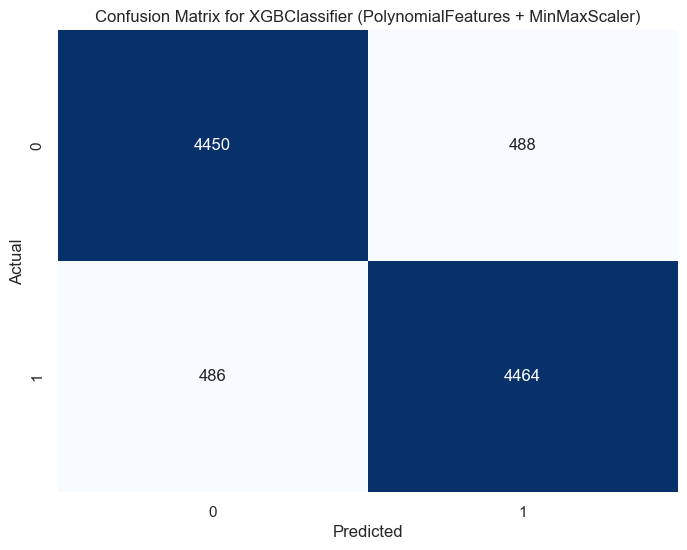

              precision    recall  f1-score   support

       False       0.90      0.90      0.90      4938
        True       0.90      0.90      0.90      4950

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888

-----------------------------------
Training XGBClassifier (RobustScaler)...
Model: XGBClassifier (RobustScaler), Accuracy: 0.90%, F1 Score: 0.90, Recall: 0.90, Precision: 0.90


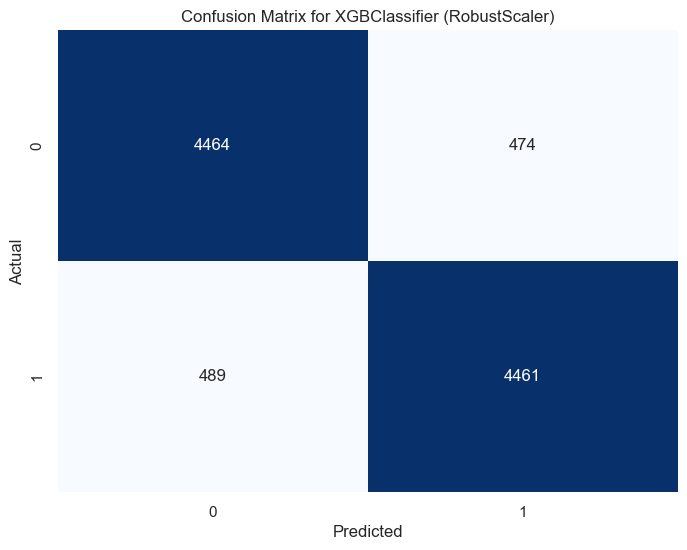

              precision    recall  f1-score   support

       False       0.90      0.90      0.90      4938
        True       0.90      0.90      0.90      4950

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888

-----------------------------------
Training XGBClassifier (RobustScaler + PolynomialFeatures)...
Model: XGBClassifier (RobustScaler + PolynomialFeatures), Accuracy: 0.90%, F1 Score: 0.90, Recall: 0.90, Precision: 0.90


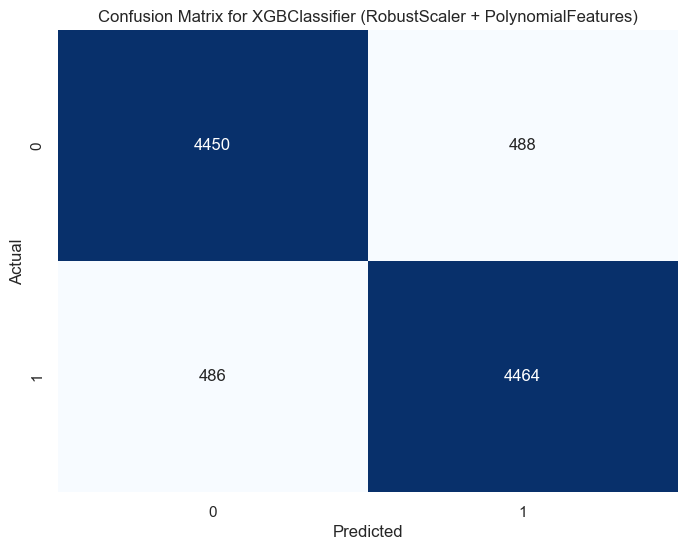

              precision    recall  f1-score   support

       False       0.90      0.90      0.90      4938
        True       0.90      0.90      0.90      4950

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888

-----------------------------------
Training SVC (Raw)...
Model: SVC (Raw), Accuracy: 0.59%, F1 Score: 0.33, Recall: 0.20, Precision: 0.95


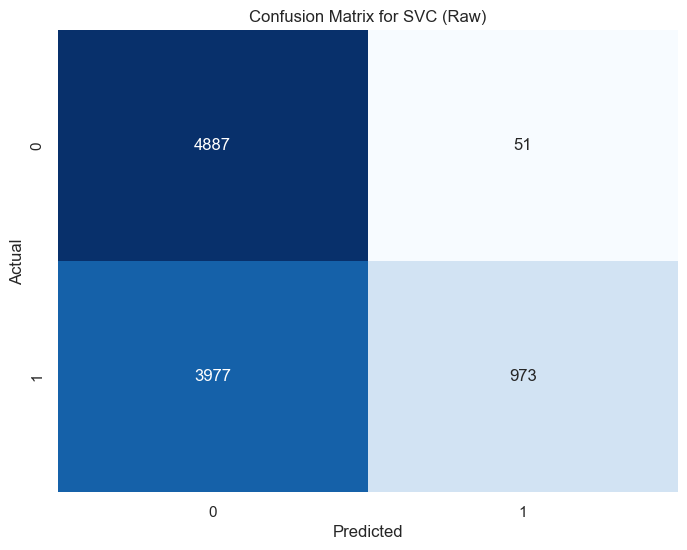

              precision    recall  f1-score   support

       False       0.55      0.99      0.71      4938
        True       0.95      0.20      0.33      4950

    accuracy                           0.59      9888
   macro avg       0.75      0.59      0.52      9888
weighted avg       0.75      0.59      0.52      9888

-----------------------------------
Training SVC (StandardScaler)...
Model: SVC (StandardScaler), Accuracy: 0.88%, F1 Score: 0.88, Recall: 0.87, Precision: 0.89


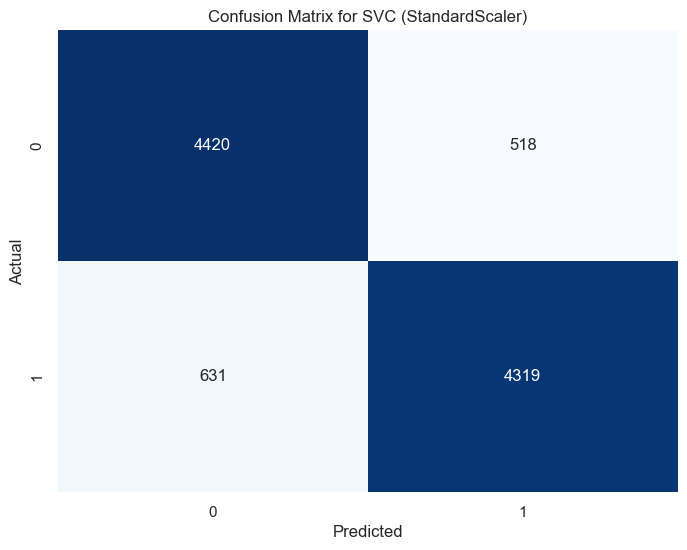

              precision    recall  f1-score   support

       False       0.88      0.90      0.88      4938
        True       0.89      0.87      0.88      4950

    accuracy                           0.88      9888
   macro avg       0.88      0.88      0.88      9888
weighted avg       0.88      0.88      0.88      9888

-----------------------------------
Training SVC (MinMaxScaler)...
Model: SVC (MinMaxScaler), Accuracy: 0.88%, F1 Score: 0.88, Recall: 0.87, Precision: 0.88


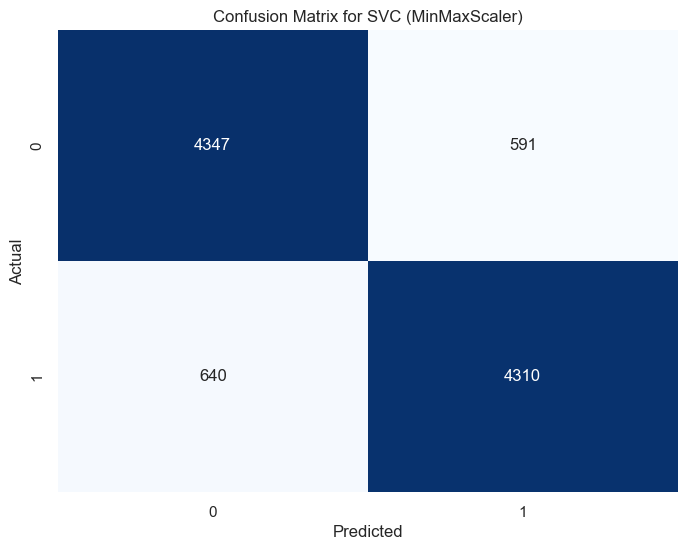

              precision    recall  f1-score   support

       False       0.87      0.88      0.88      4938
        True       0.88      0.87      0.88      4950

    accuracy                           0.88      9888
   macro avg       0.88      0.88      0.88      9888
weighted avg       0.88      0.88      0.88      9888

-----------------------------------
Training SVC (PolynomialFeatures)...
Model: SVC (PolynomialFeatures), Accuracy: 0.57%, F1 Score: 0.26, Recall: 0.15, Precision: 0.97


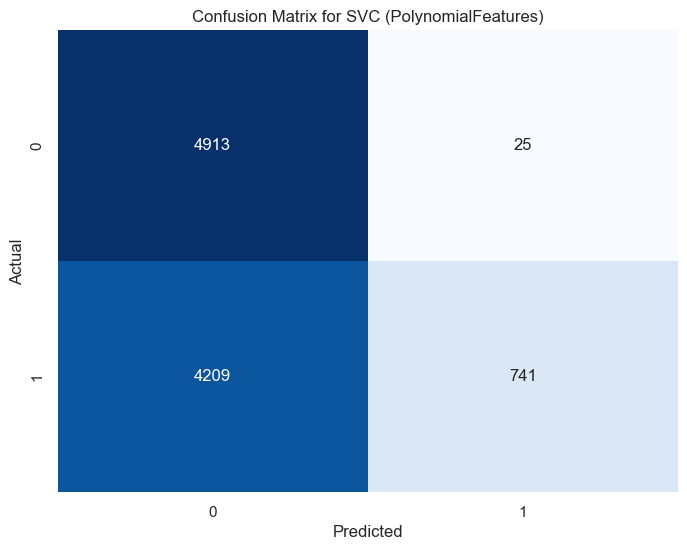

              precision    recall  f1-score   support

       False       0.54      0.99      0.70      4938
        True       0.97      0.15      0.26      4950

    accuracy                           0.57      9888
   macro avg       0.75      0.57      0.48      9888
weighted avg       0.75      0.57      0.48      9888

-----------------------------------
Training SVC (PolynomialFeatures + StandardScaler)...
Model: SVC (PolynomialFeatures + StandardScaler), Accuracy: 0.88%, F1 Score: 0.88, Recall: 0.87, Precision: 0.88


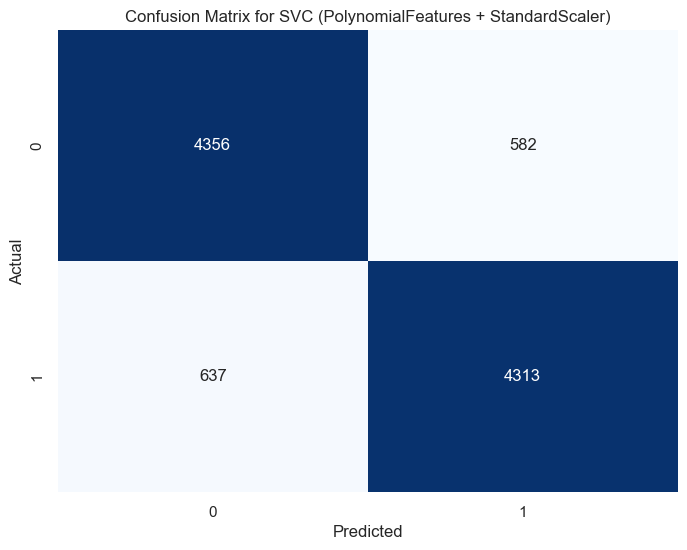

              precision    recall  f1-score   support

       False       0.87      0.88      0.88      4938
        True       0.88      0.87      0.88      4950

    accuracy                           0.88      9888
   macro avg       0.88      0.88      0.88      9888
weighted avg       0.88      0.88      0.88      9888

-----------------------------------
Training SVC (PolynomialFeatures + MinMaxScaler)...
Model: SVC (PolynomialFeatures + MinMaxScaler), Accuracy: 0.88%, F1 Score: 0.87, Recall: 0.87, Precision: 0.88


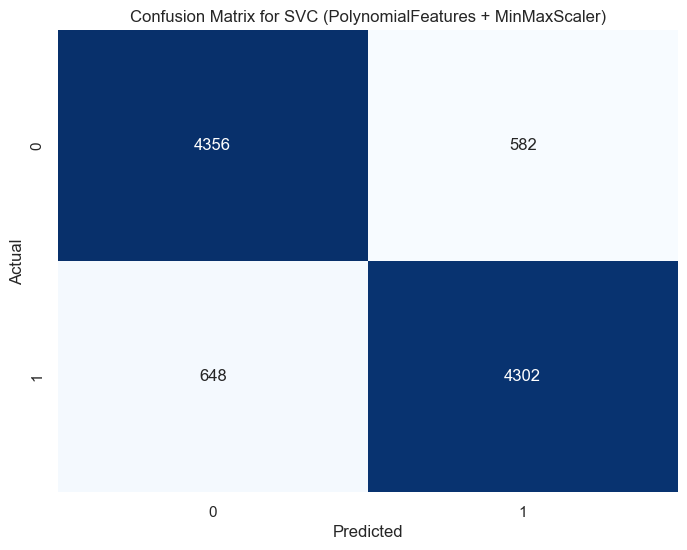

              precision    recall  f1-score   support

       False       0.87      0.88      0.88      4938
        True       0.88      0.87      0.87      4950

    accuracy                           0.88      9888
   macro avg       0.88      0.88      0.88      9888
weighted avg       0.88      0.88      0.88      9888

-----------------------------------
Training SVC (RobustScaler)...
Model: SVC (RobustScaler), Accuracy: 0.63%, F1 Score: 0.44, Recall: 0.29, Precision: 0.88


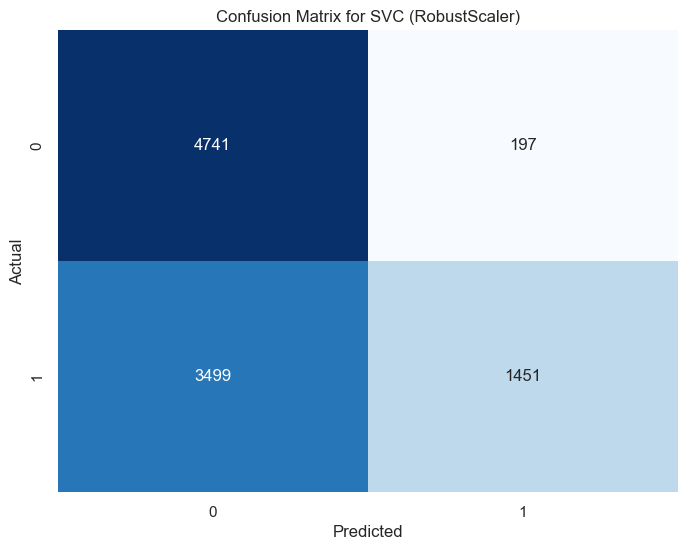

              precision    recall  f1-score   support

       False       0.58      0.96      0.72      4938
        True       0.88      0.29      0.44      4950

    accuracy                           0.63      9888
   macro avg       0.73      0.63      0.58      9888
weighted avg       0.73      0.63      0.58      9888

-----------------------------------
Training SVC (RobustScaler + PolynomialFeatures)...
Model: SVC (RobustScaler + PolynomialFeatures), Accuracy: 0.62%, F1 Score: 0.43, Recall: 0.29, Precision: 0.85


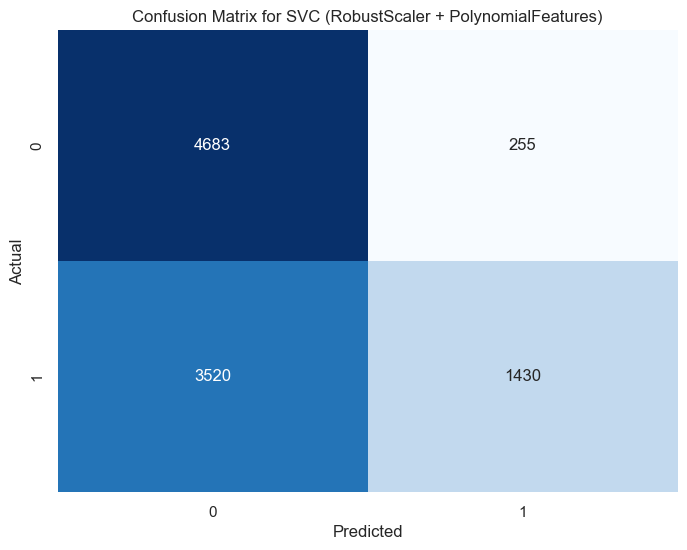

              precision    recall  f1-score   support

       False       0.57      0.95      0.71      4938
        True       0.85      0.29      0.43      4950

    accuracy                           0.62      9888
   macro avg       0.71      0.62      0.57      9888
weighted avg       0.71      0.62      0.57      9888

-----------------------------------
Training KNeighborsClassifier (Raw)...
Model: KNeighborsClassifier (Raw), Accuracy: 0.72%, F1 Score: 0.73, Recall: 0.77, Precision: 0.70


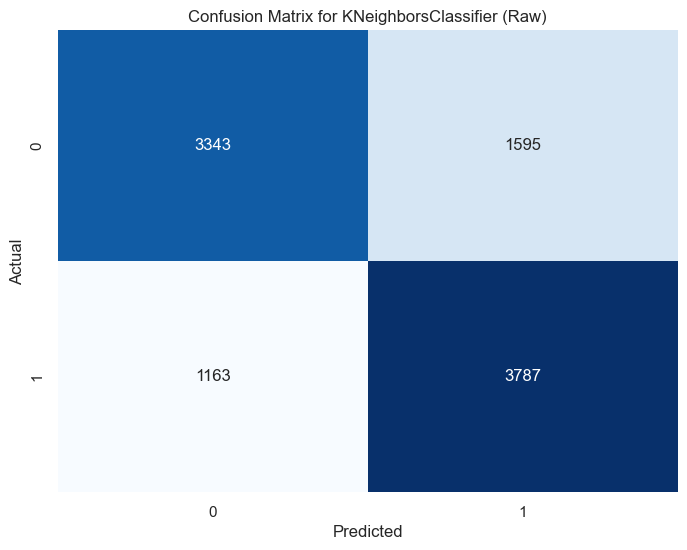

              precision    recall  f1-score   support

       False       0.74      0.68      0.71      4938
        True       0.70      0.77      0.73      4950

    accuracy                           0.72      9888
   macro avg       0.72      0.72      0.72      9888
weighted avg       0.72      0.72      0.72      9888

-----------------------------------
Training KNeighborsClassifier (StandardScaler)...
Model: KNeighborsClassifier (StandardScaler), Accuracy: 0.87%, F1 Score: 0.87, Recall: 0.86, Precision: 0.88


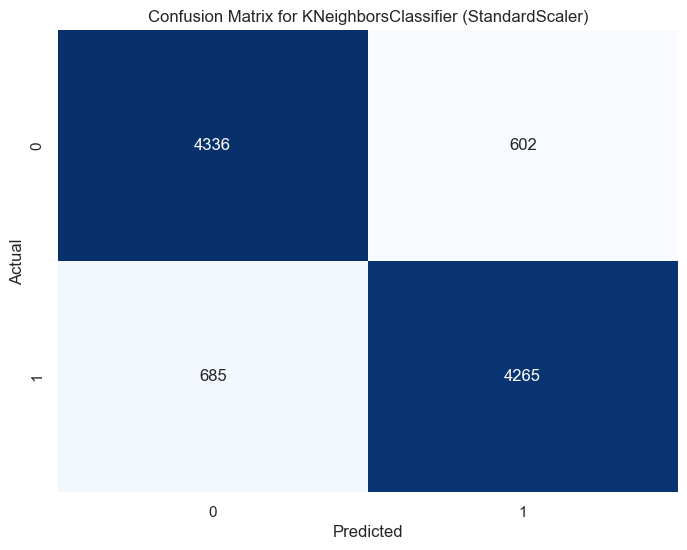

              precision    recall  f1-score   support

       False       0.86      0.88      0.87      4938
        True       0.88      0.86      0.87      4950

    accuracy                           0.87      9888
   macro avg       0.87      0.87      0.87      9888
weighted avg       0.87      0.87      0.87      9888

-----------------------------------
Training KNeighborsClassifier (MinMaxScaler)...
Model: KNeighborsClassifier (MinMaxScaler), Accuracy: 0.87%, F1 Score: 0.87, Recall: 0.87, Precision: 0.88


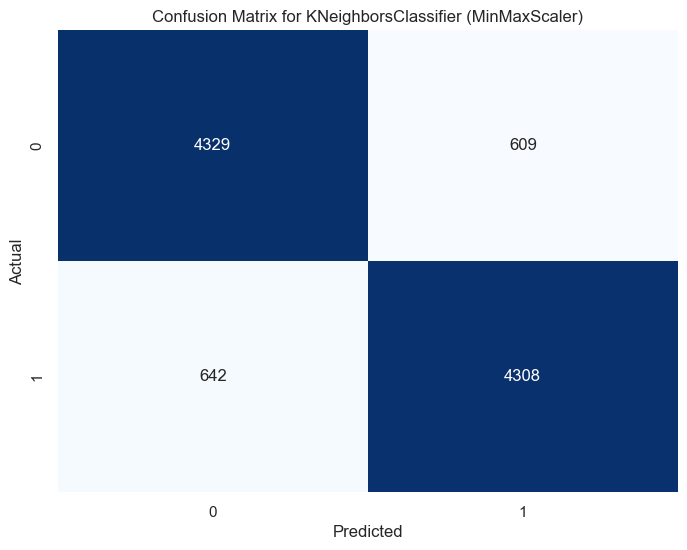

              precision    recall  f1-score   support

       False       0.87      0.88      0.87      4938
        True       0.88      0.87      0.87      4950

    accuracy                           0.87      9888
   macro avg       0.87      0.87      0.87      9888
weighted avg       0.87      0.87      0.87      9888

-----------------------------------
Training KNeighborsClassifier (PolynomialFeatures)...
Model: KNeighborsClassifier (PolynomialFeatures), Accuracy: 0.71%, F1 Score: 0.72, Recall: 0.74, Precision: 0.70


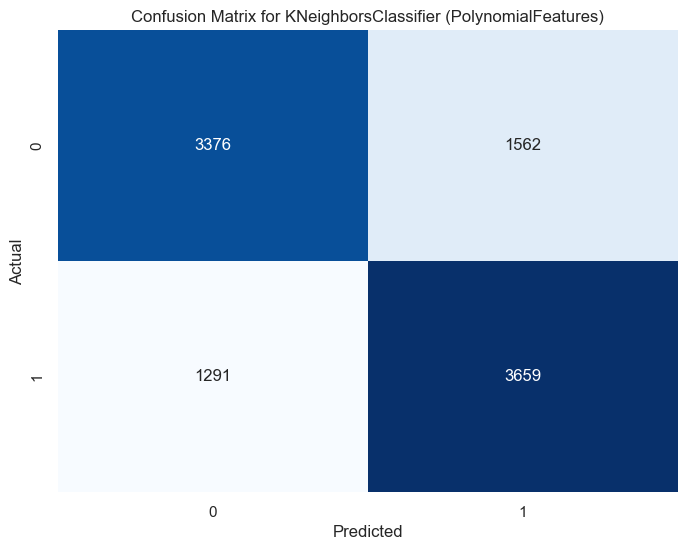

              precision    recall  f1-score   support

       False       0.72      0.68      0.70      4938
        True       0.70      0.74      0.72      4950

    accuracy                           0.71      9888
   macro avg       0.71      0.71      0.71      9888
weighted avg       0.71      0.71      0.71      9888

-----------------------------------
Training KNeighborsClassifier (PolynomialFeatures + StandardScaler)...
Model: KNeighborsClassifier (PolynomialFeatures + StandardScaler), Accuracy: 0.88%, F1 Score: 0.87, Recall: 0.87, Precision: 0.88


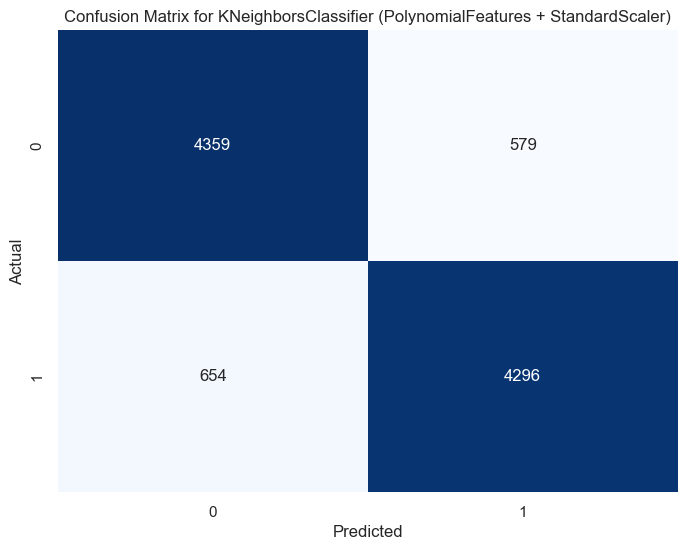

              precision    recall  f1-score   support

       False       0.87      0.88      0.88      4938
        True       0.88      0.87      0.87      4950

    accuracy                           0.88      9888
   macro avg       0.88      0.88      0.88      9888
weighted avg       0.88      0.88      0.88      9888

-----------------------------------
Training KNeighborsClassifier (PolynomialFeatures + MinMaxScaler)...
Model: KNeighborsClassifier (PolynomialFeatures + MinMaxScaler), Accuracy: 0.87%, F1 Score: 0.87, Recall: 0.87, Precision: 0.87


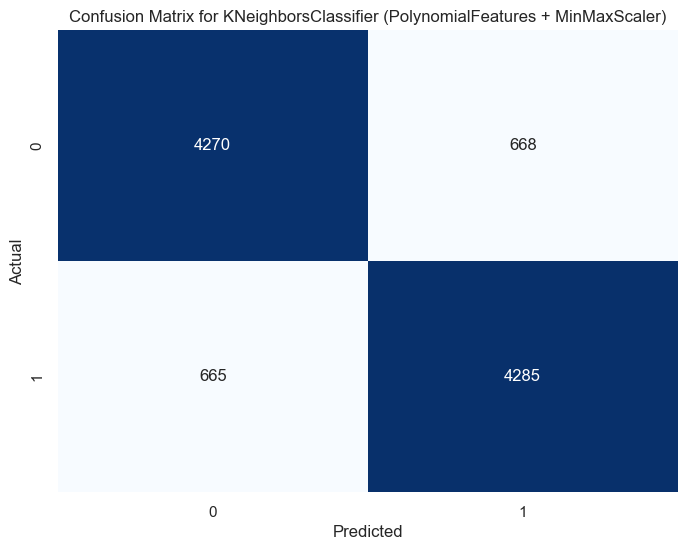

              precision    recall  f1-score   support

       False       0.87      0.86      0.86      4938
        True       0.87      0.87      0.87      4950

    accuracy                           0.87      9888
   macro avg       0.87      0.87      0.87      9888
weighted avg       0.87      0.87      0.87      9888

-----------------------------------
Training KNeighborsClassifier (RobustScaler)...
Model: KNeighborsClassifier (RobustScaler), Accuracy: 0.88%, F1 Score: 0.88, Recall: 0.89, Precision: 0.88


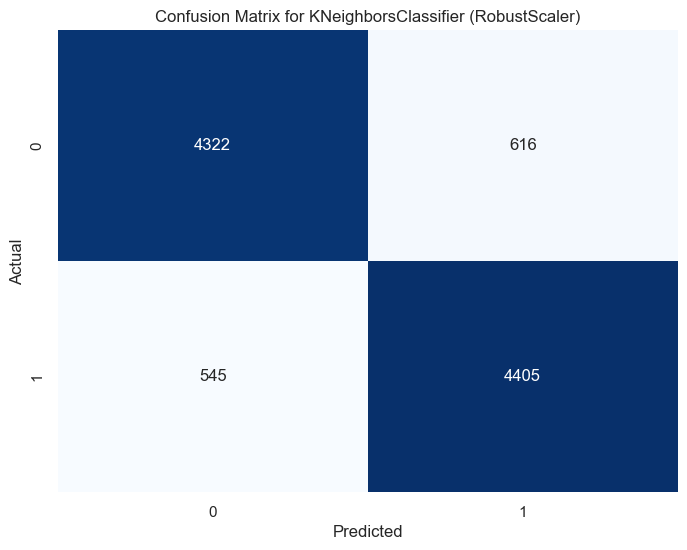

              precision    recall  f1-score   support

       False       0.89      0.88      0.88      4938
        True       0.88      0.89      0.88      4950

    accuracy                           0.88      9888
   macro avg       0.88      0.88      0.88      9888
weighted avg       0.88      0.88      0.88      9888

-----------------------------------
Training KNeighborsClassifier (RobustScaler + PolynomialFeatures)...
Model: KNeighborsClassifier (RobustScaler + PolynomialFeatures), Accuracy: 0.85%, F1 Score: 0.86, Recall: 0.87, Precision: 0.84


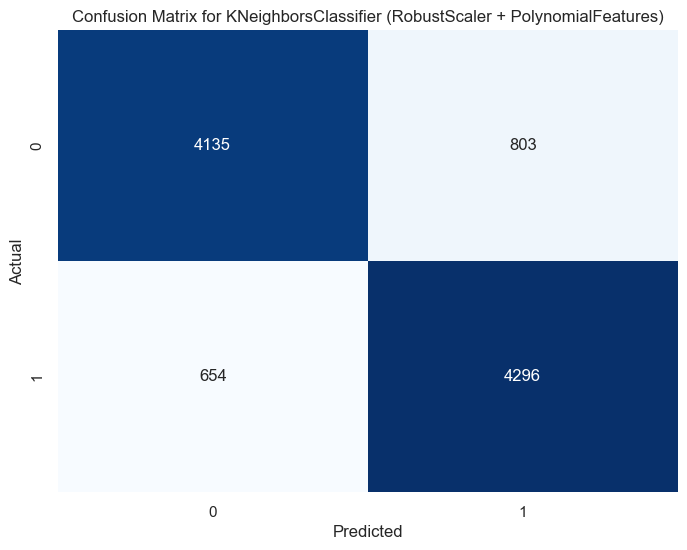

              precision    recall  f1-score   support

       False       0.86      0.84      0.85      4938
        True       0.84      0.87      0.86      4950

    accuracy                           0.85      9888
   macro avg       0.85      0.85      0.85      9888
weighted avg       0.85      0.85      0.85      9888

-----------------------------------


In [ ]:
randomforset = RandomForestClassifier()
gradientboost = GradientBoostingClassifier(learning_rate=.5)
adaboost = AdaBoostClassifier()
xgboost = XGBClassifier()
svm = SVC()
knn = KNeighborsClassifier()
logistic = LogisticRegression()
models = [logistic, randomforset, gradientboost, adaboost, xgboost]
# train and test the models
scores = train_test_model(models, X_train, y_train, X_test, y_test)

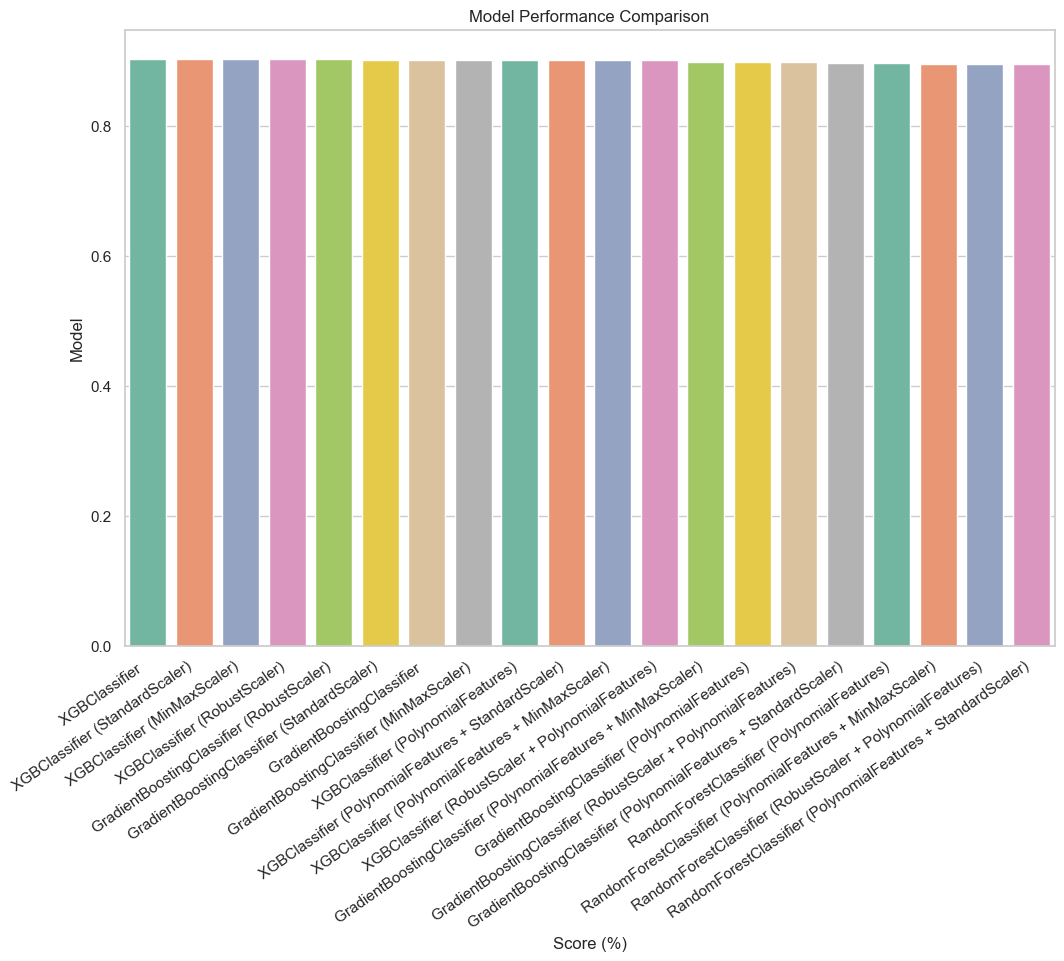

In [389]:
scores_df = pd.DataFrame(scores)
scores_df['Model name'] = scores_df['Model name'].str.replace('(Raw)', '')
scores_df = scores_df.sort_values(by=['Accuracy', 'F1 Score', 'Recall', 'Precision'], ascending=False).reset_index(drop=True)
top_10_models = scores_df.head(20)
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
sns.barplot(x='Model name', y='Accuracy', data= top_10_models, palette='Set2')
plt.xticks(rotation=35, ha='right')
plt.title('Model Performance Comparison')
plt.xlabel('Score (%)')
plt.ylabel('Model')
plt.show()

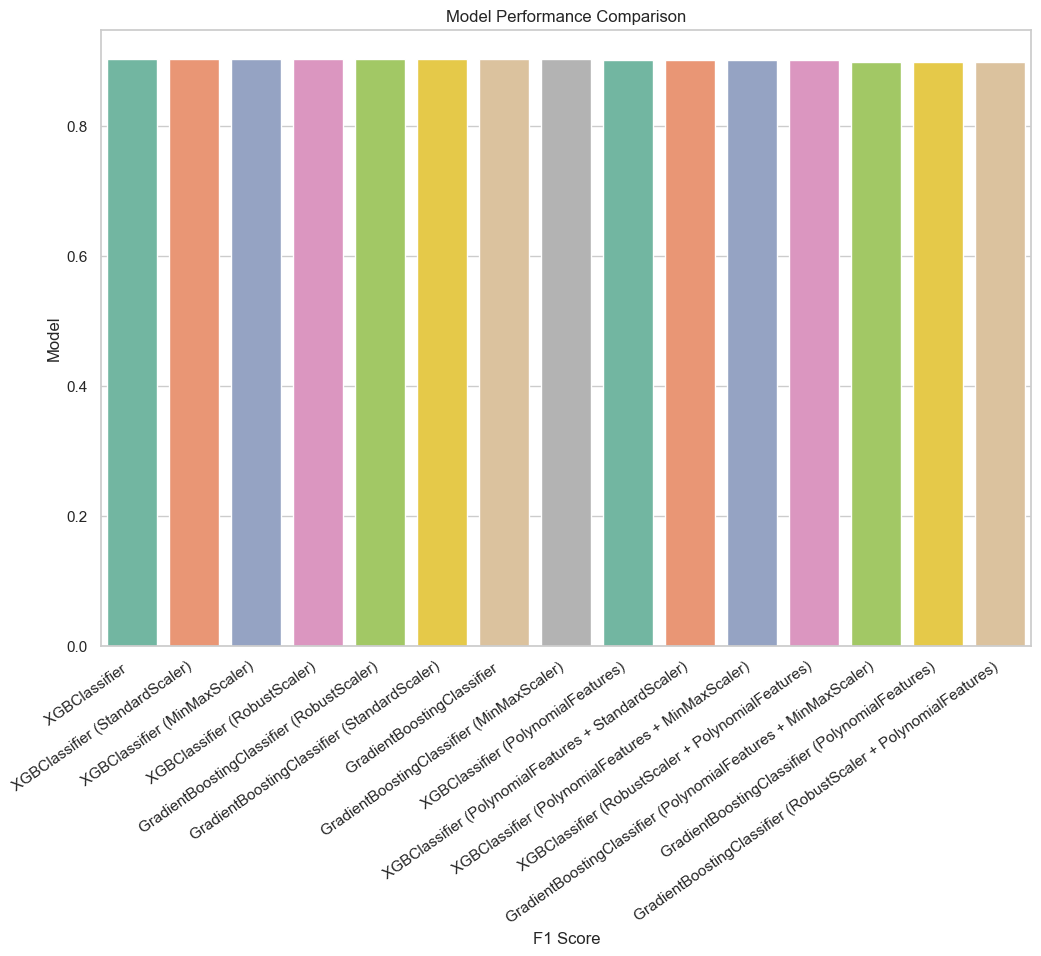

In [390]:
scores_df_f1 = scores_df.sort_values(by='F1 Score', ascending=True).reset_index(drop=True)
top_10_models = scores_df.head(15)
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
sns.barplot(x='Model name', y='F1 Score', data= top_10_models, palette='Set2')
plt.xticks(rotation=35, ha='right')
plt.title('Model Performance Comparison')
plt.xlabel('F1 Score')
plt.ylabel('Model')
plt.show()

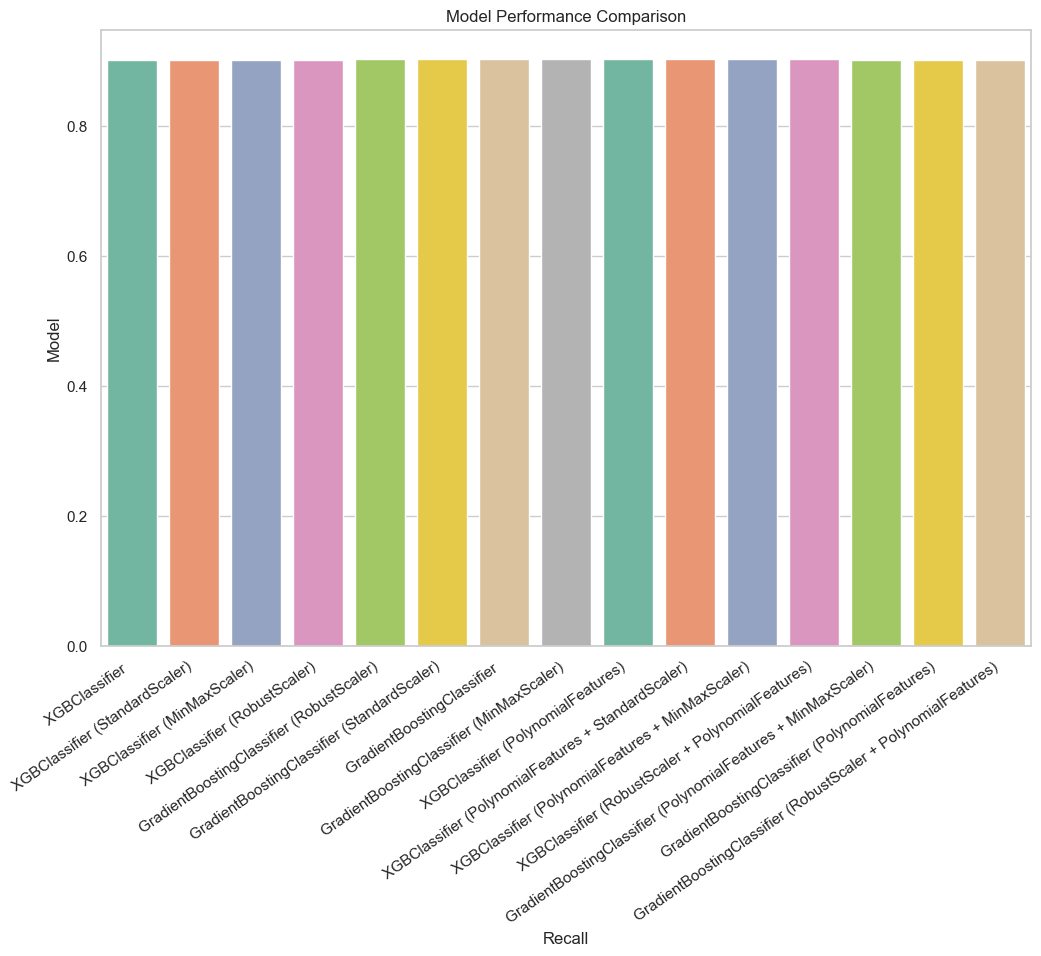

In [391]:
scores_df_Recall = scores_df.sort_values(by='Recall', ascending=True).reset_index(drop=True)
top_10_models = scores_df.head(15)
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
sns.barplot(x='Model name', y='Recall', data= top_10_models, palette='Set2')
plt.xticks(rotation=35, ha='right')
plt.title('Model Performance Comparison')
plt.xlabel('Recall')
plt.ylabel('Model')
plt.show()

In [401]:
X_test = test_data.drop('income', axis=1)
y_test = test_data['income']

In [402]:
poly = PolynomialFeatures(degree=2)
X_test = poly.fit_transform(X_test)

In [394]:
print(f"Best model: {best_model_info['Model name']}")

Best model: XGBClassifier 


In [403]:
# save the best model
best_model_info = scores_df.iloc[0]
best_model = best_model_info['Model']
# scaler = best_model_info['Scaler']
# poly_d_2 = best_model_info['Polynomial Features']
# poly_X_test = poly_d_2.fit_transform(X_test)
# scaler_poly_X_test = scaler.transform(poly_X_test)
if best_model_info['Polynomial Features'] is not None:
    poly_d_2 = best_model_info['Polynomial Features']
    X_test_transformed = poly_d_2.transform(X_test)
else:
    X_test_transformed = X_test

if best_model_info['Scaler'] is not None:
    scaler = best_model_info['Scaler']
    X_test_transformed = scaler.transform(X_test_transformed)

predict = best_model.predict(X_test_transformed)
accuracy = accuracy_score(y_test, predict)
f1 = f1_score(y_test, predict)
recall = recall_score(y_test, predict)
precision = precision_score(y_test, predict)


print(f"Best model: {best_model_info['Model name']}")
print(f"Accuracy: {accuracy:.2f}%")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(classification_report(y_test, predict))
import joblib
joblib.dump(best_model, 'house_price_model.pkl')

Best model: XGBClassifier 
Accuracy: 0.80%
F1 Score: 0.57
Recall: 0.57
Precision: 0.57
              precision    recall  f1-score   support

       False       0.87      0.87      0.87     12435
        True       0.57      0.57      0.57      3846

    accuracy                           0.80     16281
   macro avg       0.72      0.72      0.72     16281
weighted avg       0.80      0.80      0.80     16281



['house_price_model.pkl']

In [904]:
logmodel = LogisticRegression()
logmodel.fit(new_adult.drop('>50K',axis=1),new_adult['>50K'])

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [905]:
predictions = logmodel.predict(new_test.drop('>50K',axis=1))

In [907]:
print(confusion_matrix(new_test['>50K'],predictions))
print()
print(classification_report(new_test['>50K'],predictions))

[[11548   887]
 [ 1682  2164]]

              precision    recall  f1-score   support

       False       0.87      0.93      0.90     12435
        True       0.71      0.56      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.76     16281
weighted avg       0.83      0.84      0.84     16281

